#### DESCRIPTION:
The file FBS_feature_extraction_EDA.ipynb does the claulation of the percentage ratios for perishable, nonperishable and all items together for each country and each years
In addition, it also does the same for each food item type as as well as creates a tibble format of the data set

Furthermore, it explores compressing dimensions using PCA and also does a simple Kmeans clustering on the PCA dataset using the Euclidean distance

#### INSTALLATION: 
Install pandas package if not already present using the below command
conda install -c anaconda pandas

For PCA, Kmeans and StandardScaler, install sklearn package if not already present
conda install -c anaconda scikit-learn

Install matplotlib package if not already presen
conda install -c conda-forge matplotlib 

#### EXECUTION:
Please ensure the country_merged.csv are saved in the same location as the notebook FBS_feature_extraction_EDA.ipynb. Then simply run the notebook.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("country_merged.csv", index_col=0)
df.head()

,Area,Item,Non Perishable Code,Non Perishable,Element,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total All Years
0,"China, mainland",Bananas,-1,P,Production,48.0,35.0,43.0,99.0,145.0,...,9561.0,10400.0,11558.0,12075.0,11792.0,10627.0,10940.0,11170.0,11222.0,202606.0
1,"China, mainland",Bananas,-1,P,Losses,5.0,4.0,4.0,10.0,15.0,...,2045.0,2244.0,2437.0,2518.0,2584.0,2340.0,2365.0,2442.0,2553.0,34829.0
2,"China, mainland",Vegetables,-1,P,Production,58165.0,54298.0,48045.0,43051.0,45651.0,...,542797.0,561453.0,567914.0,580702.0,576841.0,604867.0,614694.0,618719.0,624524.0,13516993.0
3,"China, mainland",Vegetables,-1,P,Losses,4273.0,4074.0,3581.0,3197.0,3404.0,...,44267.0,47906.0,42497.0,43406.0,47860.0,49286.0,50169.0,50682.0,47779.0,1073515.0
4,"China, mainland",Alcoholic Beverages,1,NP,Production,689.0,910.0,832.0,863.0,1004.0,...,58985.0,62455.0,61946.0,64828.0,66366.0,62484.0,60016.0,60077.0,53565.0,1333750.0


In [3]:
df_production = df[df.Element=='Production']
df_losses = df[df.Element=="Losses"]



In [4]:
df_losses.head()

,Area,Item,Non Perishable Code,Non Perishable,Element,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total All Years
1,"China, mainland",Bananas,-1,P,Losses,5.0,4.0,4.0,10.0,15.0,...,2045.0,2244.0,2437.0,2518.0,2584.0,2340.0,2365.0,2442.0,2553.0,34829.0
3,"China, mainland",Vegetables,-1,P,Losses,4273.0,4074.0,3581.0,3197.0,3404.0,...,44267.0,47906.0,42497.0,43406.0,47860.0,49286.0,50169.0,50682.0,47779.0,1073515.0
5,"China, mainland",Alcoholic Beverages,1,NP,Losses,0.0,0.0,0.0,0.0,0.0,...,57.0,57.0,57.0,57.0,59.0,57.0,56.0,58.0,57.0,1266.0
7,"China, mainland",Sugar cane,-1,P,Losses,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6255.0,5332.0,5140.0,5199.0,5385.0,27311.0
9,"China, mainland",Offals,-1,P,Losses,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,215.0,216.0,213.0,215.0,76.0,935.0


In [5]:
losses_rename = {str(key):"losses_"+str(key) for key in range (1961, 2019)}
production_rename = {str(key):"production_"+str(key) for key in range (1961, 2019)}

In [6]:
df_losses.rename(columns = losses_rename, inplace=True)
df_production.rename(columns = production_rename, inplace=True)

C:\Users\sylvi\Anaconda3\lib\site-packages\pandas\core\frame.py:4449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [7]:
df_losses.rename(columns = {"Total All Years":"Total Losses All Years"}, inplace=True)
df_production.rename(columns = {"Total All Years":"Total Production All Years"}, inplace=True)

In [8]:
df_full = pd.merge(left = df_production,right =  df_losses, on = ['Area','Item','Non Perishable','Non Perishable Code'])

In [9]:
df_full.drop(['Element_x','Element_y'], axis = 1, inplace=True)

In [10]:
df_full.head()

,Area,Item,Non Perishable Code,Non Perishable,production_1961,production_1962,production_1963,production_1964,production_1965,production_1966,...,losses_2010,losses_2011,losses_2012,losses_2013,losses_2014,losses_2015,losses_2016,losses_2017,losses_2018,Total Losses All Years
0,"China, mainland",Bananas,-1,P,48.0,35.0,43.0,99.0,145.0,120.0,...,2045.0,2244.0,2437.0,2518.0,2584.0,2340.0,2365.0,2442.0,2553.0,34829.0
1,"China, mainland",Vegetables,-1,P,58165.0,54298.0,48045.0,43051.0,45651.0,45000.0,...,44267.0,47906.0,42497.0,43406.0,47860.0,49286.0,50169.0,50682.0,47779.0,1073515.0
2,"China, mainland",Alcoholic Beverages,1,NP,689.0,910.0,832.0,863.0,1004.0,1116.0,...,57.0,57.0,57.0,57.0,59.0,57.0,56.0,58.0,57.0,1266.0
3,"China, mainland",Sugar cane,-1,P,4268.0,3443.0,7802.0,12161.0,13390.0,11408.0,...,0.0,0.0,0.0,0.0,6255.0,5332.0,5140.0,5199.0,5385.0,27311.0
4,"China, mainland",Offals,-1,P,118.0,145.0,235.0,303.0,348.0,381.0,...,0.0,0.0,0.0,0.0,215.0,216.0,213.0,215.0,76.0,935.0


In [11]:
for year in range (1961, 2019):
    col1 = "losses_"+str(year)
    col2 = "production_"+str(year)
    col3 = "ratio_percent_" + str(year)
    df_full[col3] = 100 * df_full[col1] / df_full[col2]

In [12]:
df_full["ratio_percent_total"] = 100 * df_full["Total Losses All Years"] / df_full["Total Production All Years"]


In [13]:
df_full.head()

,Area,Item,Non Perishable Code,Non Perishable,production_1961,production_1962,production_1963,production_1964,production_1965,production_1966,...,ratio_percent_2010,ratio_percent_2011,ratio_percent_2012,ratio_percent_2013,ratio_percent_2014,ratio_percent_2015,ratio_percent_2016,ratio_percent_2017,ratio_percent_2018,ratio_percent_total
0,"China, mainland",Bananas,-1,P,48.0,35.0,43.0,99.0,145.0,120.0,...,21.388976,21.576923,21.084963,20.853002,21.913161,22.019385,21.617916,21.862131,22.749955,17.190508
1,"China, mainland",Vegetables,-1,P,58165.0,54298.0,48045.0,43051.0,45651.0,45000.0,...,8.155351,8.532504,7.482999,7.474746,8.296914,8.148238,8.161622,8.191441,7.650467,7.941966
2,"China, mainland",Alcoholic Beverages,1,NP,689.0,910.0,832.0,863.0,1004.0,1116.0,...,0.096635,0.091266,0.092016,0.087925,0.088901,0.091223,0.093308,0.096543,0.106413,0.094920
3,"China, mainland",Sugar cane,-1,P,4268.0,3443.0,7802.0,12161.0,13390.0,11408.0,...,0.000000,0.000000,0.000000,0.000000,4.979659,4.980199,4.979896,4.979694,4.981637,0.821296
4,"China, mainland",Offals,-1,P,118.0,145.0,235.0,303.0,348.0,381.0,...,0.000000,0.000000,0.000000,0.000000,4.549302,4.556001,4.548366,4.522507,1.595968,0.839876


In [14]:
df_full.to_csv("countries_with_ratios.csv", index=False)

In [15]:
frames = []
df_country_counts = df_full["Area"].copy()
df_country_counts.drop_duplicates(inplace=True)

df_country_counts.fillna(0.0, inplace=True)
df_losses.fillna(0.0, inplace=True)
df_production.fillna(0.0, inplace=True)

for year in range (1961, 2019):
    year = str(year)
    col = "losses_" + year
    temp_loss_np = df_losses[(df_losses[col] > 0) & (df_losses["Non Perishable"] == 'NP')]
    temp_loss_p = df_losses[(df_losses[col] > 0) & (df_losses["Non Perishable"] == 'P')]
    
    temp_l1 = temp_loss_np.groupby('Area').agg({'Non Perishable Code':"count", col: "sum"}).rename(columns={'Non Perishable Code':"NPL_count_"+year, col:"NPL_"+year}).reset_index()
    temp_l2 = temp_loss_p.groupby('Area').agg({'Non Perishable Code':"count", col: "sum"}).rename(columns={'Non Perishable Code':"PL_count_"+year, col:"PL_"+year}).reset_index()                                                                                                       
       
    temp_l = pd.merge(left = temp_l1, right = temp_l2, on = "Area", how = 'outer')
    #print(temp_l.head())
    col = "production_" + year
    temp_prod_np = df_production[(df_production[col] > 0) & (df_production["Non Perishable"] == 'NP')]
    temp_prod_p = df_production[(df_production[col] > 0) & (df_production["Non Perishable"] == 'P')]
    
    temp_p1 = temp_prod_np.groupby('Area').agg({'Non Perishable Code':"count", col: "sum"}).rename(columns={'Non Perishable Code':"NPP_count_"+year, col:"NPP_"+year}).reset_index()
    temp_p2 = temp_prod_p.groupby('Area').agg({'Non Perishable Code':"count", col: "sum"}).rename(columns={'Non Perishable Code':"PP_count_"+year, col:"PP_"+year}).reset_index()                                                                                                       
    
    temp_p = pd.merge(left = temp_p1, right = temp_p2, on = "Area", how = 'outer')
    #print(temp_p.head())
    temp = pd.merge(left = temp_l, right = temp_p, on = 'Area', how = "outer")
    #print(temp.head())
    col1 = "P_ratio_percent_" + year
    col2 = "NP_ratio_percent_" + year
    
    col3 = "PL_"+year
    col4 = "PP_"+year
    temp[col1] = 100 * temp[col3] / temp[col4]
    
    col5 = "NPL_"+year
    col6 = "NPP_"+year
    temp[col2] = 100 * temp[col5] / temp[col6]
    
    col7 = "Total_ratio_percent_"+ year
    temp.fillna(0.0, inplace=True)
    temp[col7] = 100.0 * (temp[col3] + temp[col5]) / (temp[col4] + temp[col6])
    #print(temp.head())
    df_country_counts = pd.merge(left = df_country_counts, right = temp, on = ["Area"], how = "left")
    #break
df_country_counts.head()

C:\Users\sylvi\Anaconda3\lib\site-packages\pandas\core\frame.py:4468: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,Area,NPL_count_1961,NPL_1961,PL_count_1961,PL_1961,NPP_count_1961,NPP_1961,PP_count_1961,PP_1961,P_ratio_percent_1961,...,NPL_2018,PL_count_2018,PL_2018,NPP_count_2018,NPP_2018,PP_count_2018,PP_2018,P_ratio_percent_2018,NP_ratio_percent_2018,Total_ratio_percent_2018
0,"China, mainland",25.0,12389.0,26.0,18299.0,32.0,205082.0,35.0,327254.0,5.591681,...,51813.0,35.0,161822.0,32.0,1386175.0,35.0,2285834.0,7.079342,3.737840,5.817932
1,Mexico,14.0,1208.0,25.0,1714.0,23.0,20895.0,31.0,53358.0,3.212264,...,10581.0,31.0,10008.0,24.0,84705.0,32.0,217534.0,4.600660,12.491588,6.812159
2,United States of America,14.0,1193.0,21.0,7438.0,30.0,356392.0,29.0,203743.0,3.650678,...,43418.0,30.0,17665.0,31.0,1072379.0,30.0,430471.0,4.103645,4.048755,4.064477
3,Brazil,15.0,3027.0,27.0,18631.0,24.0,39162.0,31.0,189597.0,9.826632,...,20269.0,30.0,182594.0,27.0,266859.0,31.0,1812343.0,10.075024,7.595397,9.756772
4,Japan,17.0,755.0,27.0,3512.0,22.0,32935.0,34.0,57278.0,6.131499,...,1036.0,31.0,4375.0,20.0,28397.0,33.0,53916.0,8.114474,3.648273,6.573688


In [16]:
df_country_counts.columns

Index(['Area', 'NPL_count_1961', 'NPL_1961', 'PL_count_1961', 'PL_1961',
       'NPP_count_1961', 'NPP_1961', 'PP_count_1961', 'PP_1961',
       'P_ratio_percent_1961',
       ...
       'NPL_2018', 'PL_count_2018', 'PL_2018', 'NPP_count_2018', 'NPP_2018',
       'PP_count_2018', 'PP_2018', 'P_ratio_percent_2018',
       'NP_ratio_percent_2018', 'Total_ratio_percent_2018'],
      dtype='object', length=639)

In [17]:
df_country_counts.fillna(0, inplace=True)
df_country_counts.to_csv("counts_by_year.csv", index=False)

In [18]:
data_values = df_country_counts.drop("Area", axis = 1).values


In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
scaling.fit(data_values)
pca_data=scaling.transform(data_values) 
pca = PCA()
pca.fit(pca_data)

PCA()

In [20]:
import itertools as it
count = 0
ratios = it.accumulate(pca.explained_variance_ratio_)
for r in ratios:
    count +=1
    if r > .9:
        print (r)
        print("90% variance captured by",count, "components")
        break
    

0.9015271490531198
90% variance captured by 7 components


In [21]:
pca_reduced = pca.transform(pca_data)

In [22]:
pca_reduced.shape

(172, 172)

In [23]:
data_reduced = pca_reduced[:,:2]

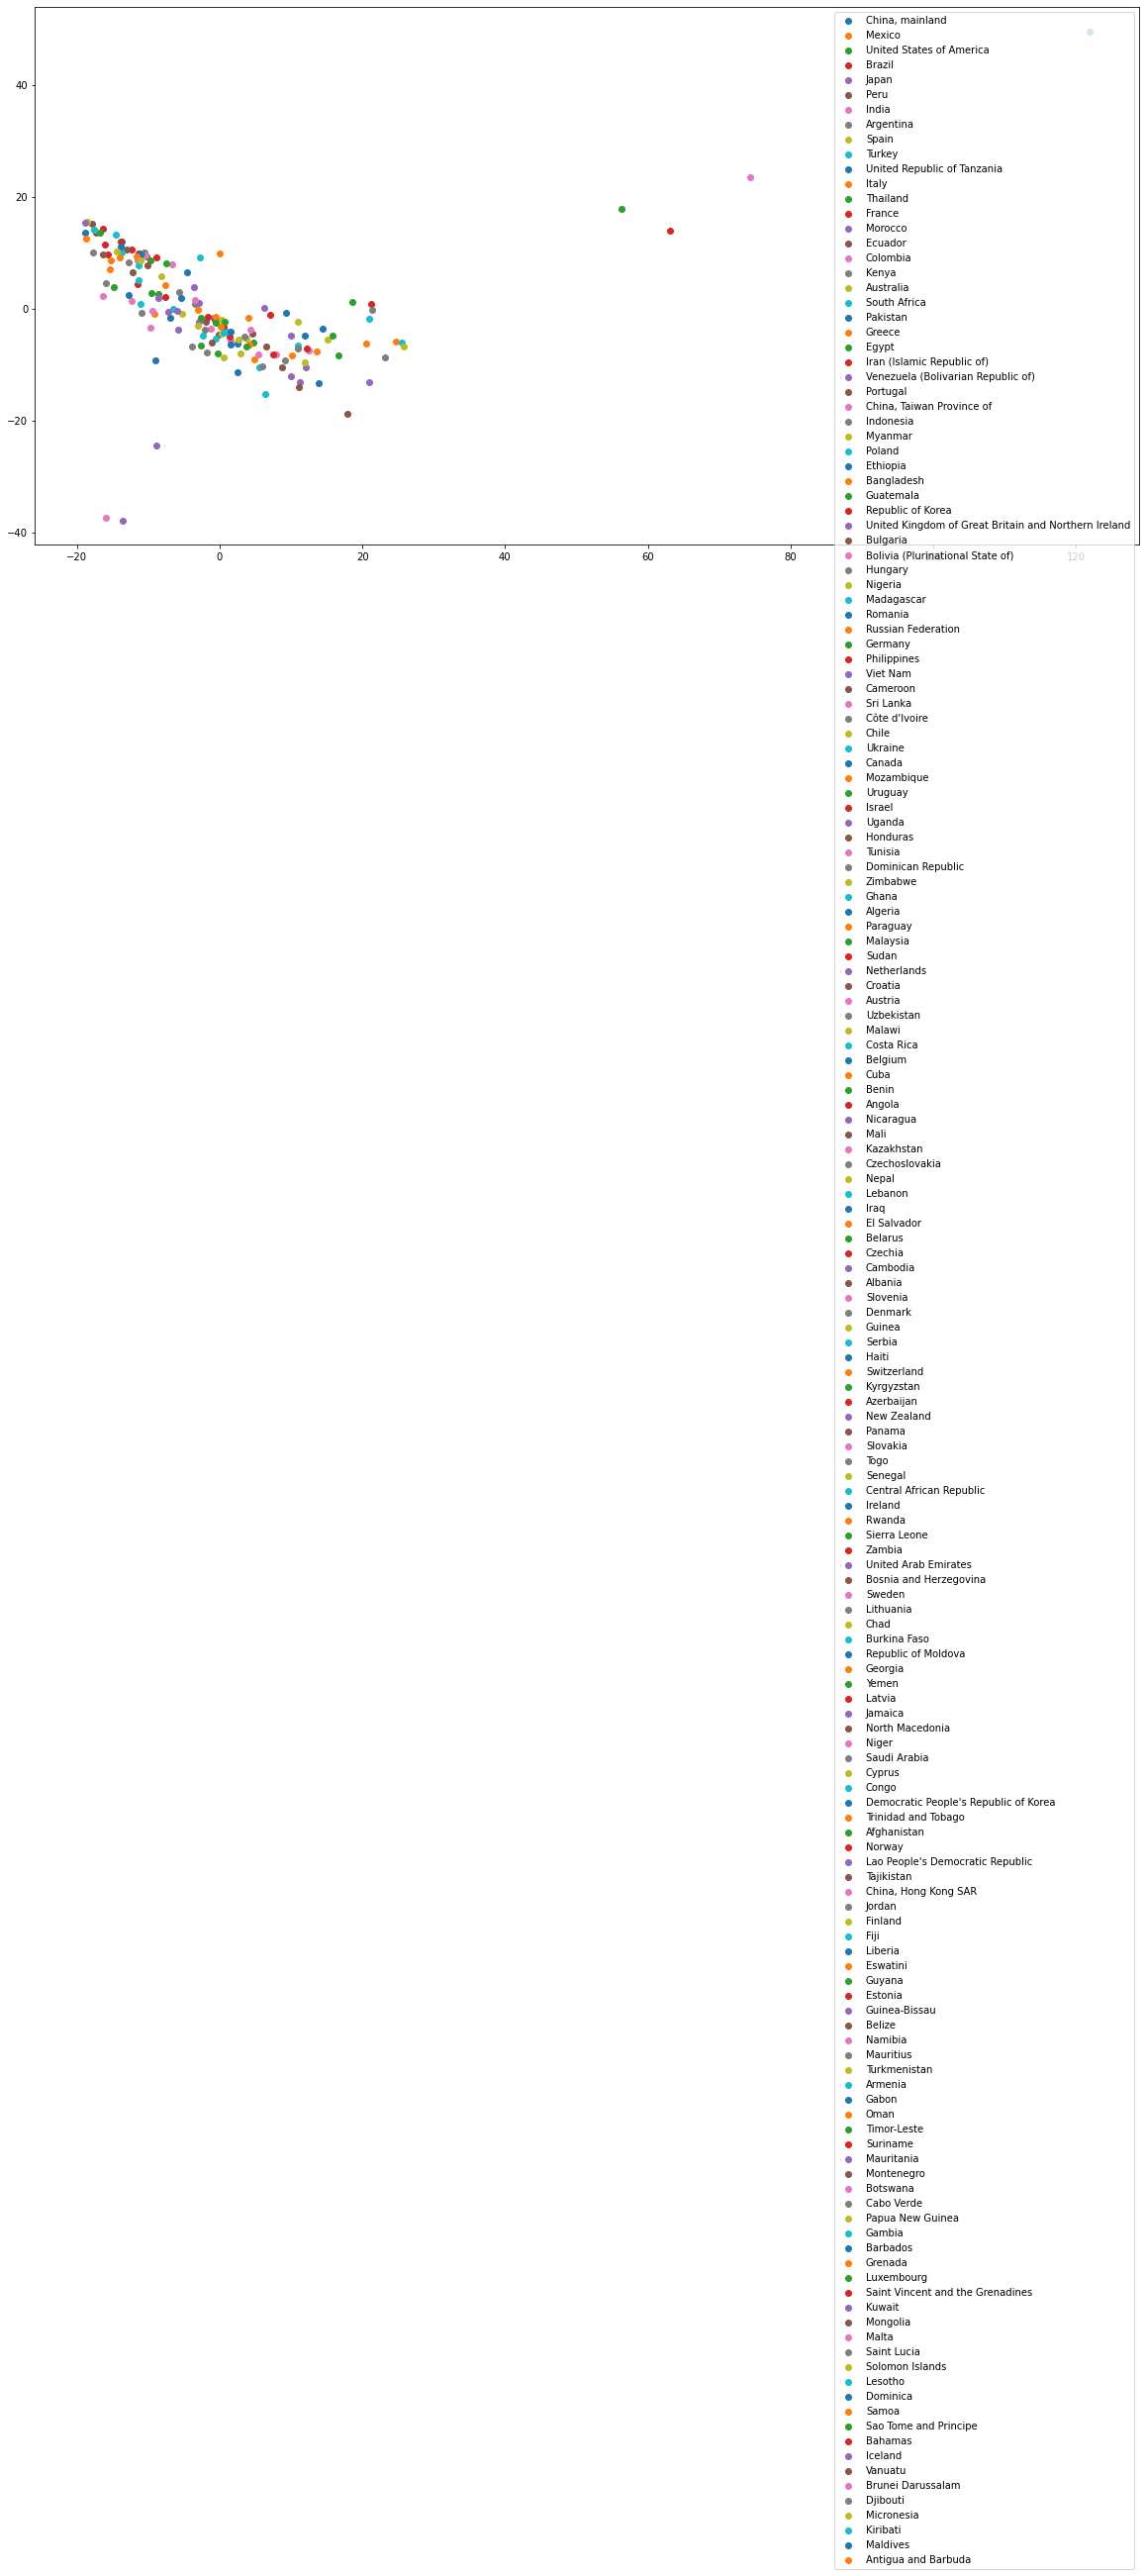

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
labels = df_country_counts.Area.values
for i in range(172):
    plt.scatter(data_reduced[i,0], data_reduced[i,1], label = labels[i])
plt.legend()
plt.show()

In [25]:
data_reduced[0,1]

49.61920488148628

C:\Users\sylvi\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


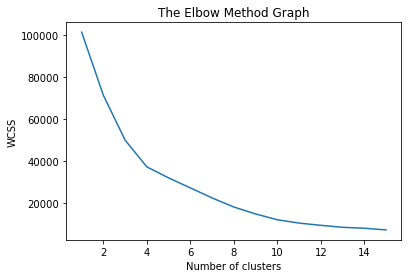

In [26]:
data_kmeans = pca_reduced[:,:8]
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,16): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
    kmeans.fit(data_kmeans)

    wcss.append(kmeans.inertia_)
#kmeans inertia_ attribute is:  Sum of squared distances of samples #to their closest cluster center.
#4.Plot the elbow graph


plt.plot(range(1,16),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:

kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
kmeans.fit(data_kmeans)
clusters = kmeans.predict(data_kmeans)

colors = ["red","blue","green","pink","black","yellow"]



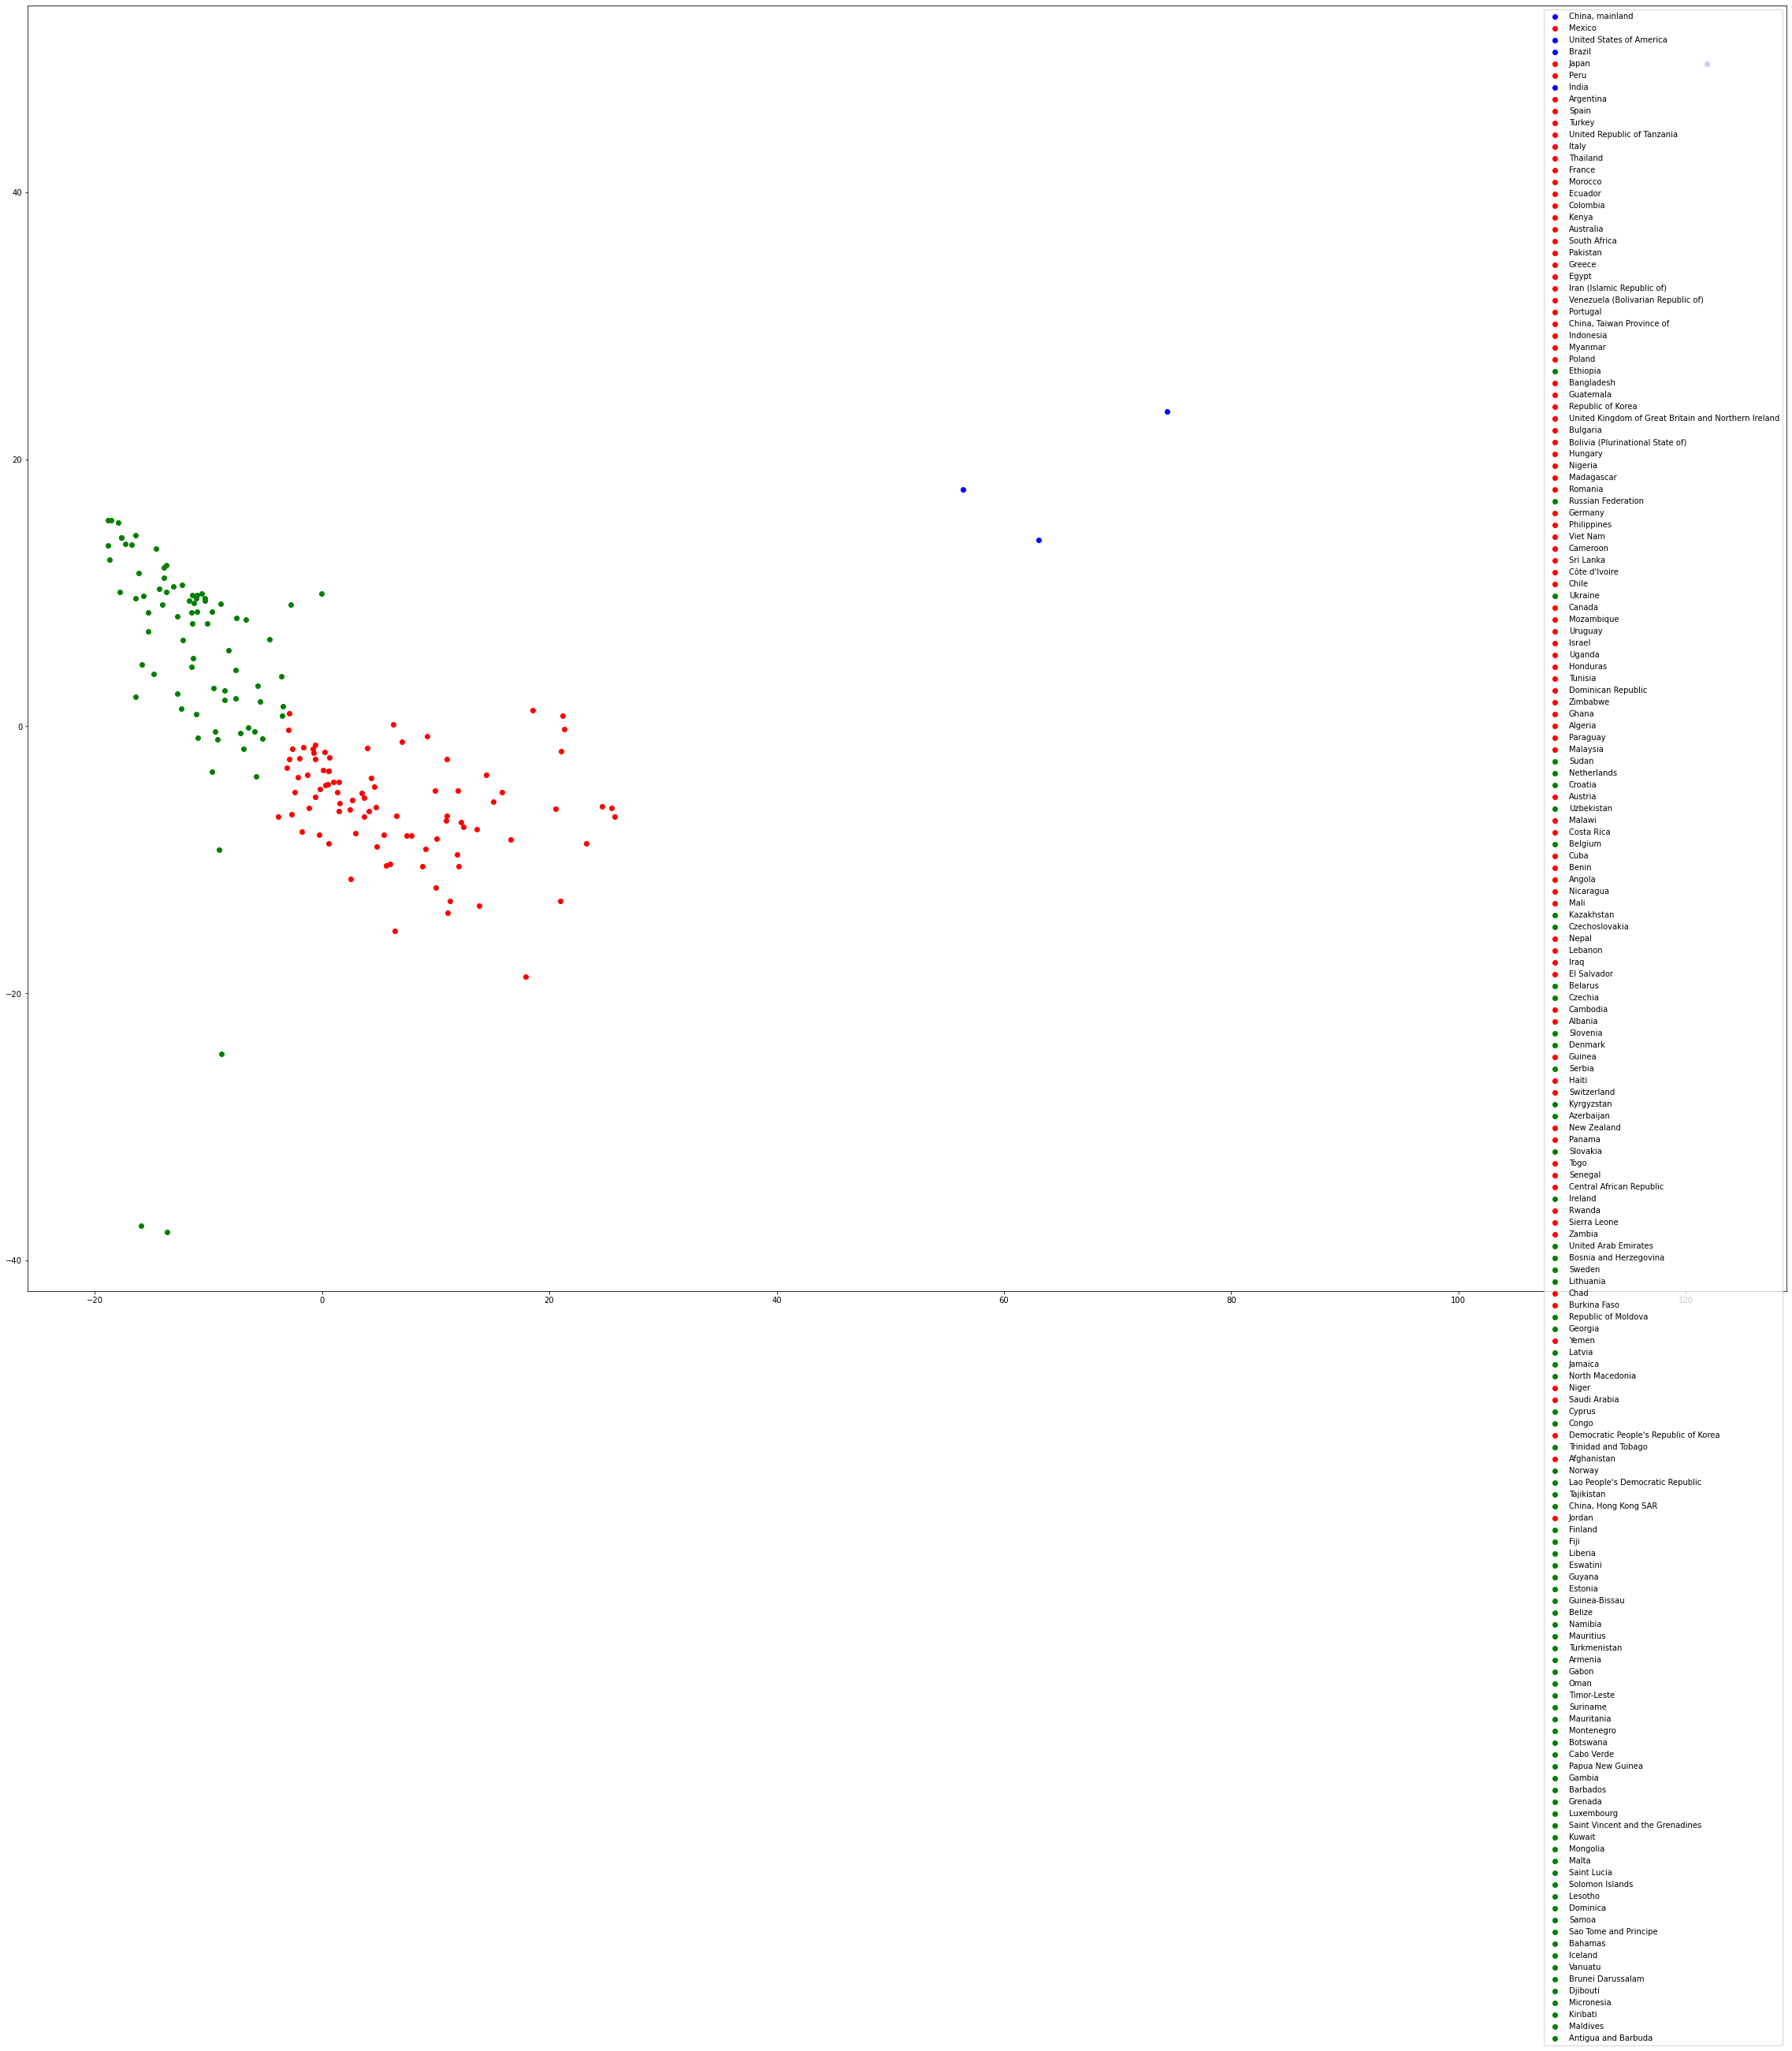

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(40,30))
for i in range(172):
    plt.scatter(data_reduced[i,0], data_reduced[i,1], color = colors[clusters[i]], label = labels[i])
plt.legend()
plt.show();

In [29]:
cols = [str(i) for i in range(1961, 2019)]

tibble = pd.melt(df, id_vars=['Area', 'Item','Non Perishable Code','Non Perishable','Element'],  var_name='Year', value_name='Amount in Tonnes')
#tibble["Year"] = tibble.Year.astype(int)
tibble.head()

,Area,Item,Non Perishable Code,Non Perishable,Element,Year,Amount in Tonnes
0,"China, mainland",Bananas,-1,P,Production,1961,48.0
1,"China, mainland",Bananas,-1,P,Losses,1961,5.0
2,"China, mainland",Vegetables,-1,P,Production,1961,58165.0
3,"China, mainland",Vegetables,-1,P,Losses,1961,4273.0
4,"China, mainland",Alcoholic Beverages,1,NP,Production,1961,689.0


In [30]:
tibble.sort_values(['Area', 'Item','Non Perishable Code','Non Perishable','Element', 'Year'], inplace = True, axis = 0)
tibble.reset_index(drop = True, inplace=True)
tibble.head()

,Area,Item,Non Perishable Code,Non Perishable,Element,Year,Amount in Tonnes
0,Afghanistan,Apples and products,-1,P,Losses,1961,1.0
1,Afghanistan,Apples and products,-1,P,Losses,1962,1.0
2,Afghanistan,Apples and products,-1,P,Losses,1963,1.0
3,Afghanistan,Apples and products,-1,P,Losses,1964,1.0
4,Afghanistan,Apples and products,-1,P,Losses,1965,1.0


In [31]:

tibble.to_csv("tibble.csv")

In [32]:
tibble.dtypes

Area                    object
Item                    object
Non Perishable Code      int64
Non Perishable          object
Element                 object
Year                    object
Amount in Tonnes       float64
dtype: object

In [33]:
last_5_years = tibble[tibble.Year.isin(["2018","2017","2016","2015","2014"])].copy()

last_5_years.reset_index(drop = True, inplace=True)

last_5_years.head()

,Area,Item,Non Perishable Code,Non Perishable,Element,Year,Amount in Tonnes
0,Afghanistan,Apples and products,-1,P,Losses,2014,7.0
1,Afghanistan,Apples and products,-1,P,Losses,2015,8.0
2,Afghanistan,Apples and products,-1,P,Losses,2016,12.0
3,Afghanistan,Apples and products,-1,P,Losses,2017,9.0
4,Afghanistan,Apples and products,-1,P,Losses,2018,11.0


# All food items

In [34]:
items_last_5_years= last_5_years.drop("Non Perishable Code", axis = 1).groupby(["Area","Element"]).sum("Amount in Tonnes").reset_index()

items_last_5_years.head()

,Area,Element,Amount in Tonnes
0,Afghanistan,Losses,11385.0
1,Afghanistan,Production,103728.0
2,Albania,Losses,2900.0
3,Albania,Production,33080.0
4,Algeria,Losses,36170.0


In [35]:
losses_last_5 = items_last_5_years[items_last_5_years.Element == "Losses"].drop("Element", axis = 1)
production_last_5 = items_last_5_years[items_last_5_years.Element == "Production"].drop("Element", axis = 1)

losses_last_5.head()

,Area,Amount in Tonnes
0,Afghanistan,11385.0
2,Albania,2900.0
4,Algeria,36170.0
6,Angola,29069.0
8,Antigua and Barbuda,5.0


In [36]:
losses_last_5.rename(columns= {"Amount in Tonnes":"Losses"}, inplace=True)
production_last_5.rename(columns= {"Amount in Tonnes":"Production"}, inplace=True)
items_last_5_years = pd.merge(left = losses_last_5, right = production_last_5, on = "Area")

items_last_5_years.head()

,Area,Losses,Production
0,Afghanistan,11385.0,103728.0
1,Albania,2900.0,33080.0
2,Algeria,36170.0,242676.0
3,Angola,29069.0,212272.0
4,Antigua and Barbuda,5.0,86.0


In [37]:
items_last_5_years["Ratio_percent"] = 100 * items_last_5_years["Losses"] / items_last_5_years["Production"]
items_last_5_years = items_last_5_years[items_last_5_years.Losses > 0]
items_last_5_years.head()

,Area,Losses,Production,Ratio_percent
0,Afghanistan,11385.0,103728.0,10.975821
1,Albania,2900.0,33080.0,8.766626
2,Algeria,36170.0,242676.0,14.904647
3,Angola,29069.0,212272.0,13.694223
4,Antigua and Barbuda,5.0,86.0,5.813953


In [38]:
temp = items_last_5_years.sort_values("Losses", ascending=True)
temp.reset_index(drop = True, inplace=True)
temp = temp.head(10)

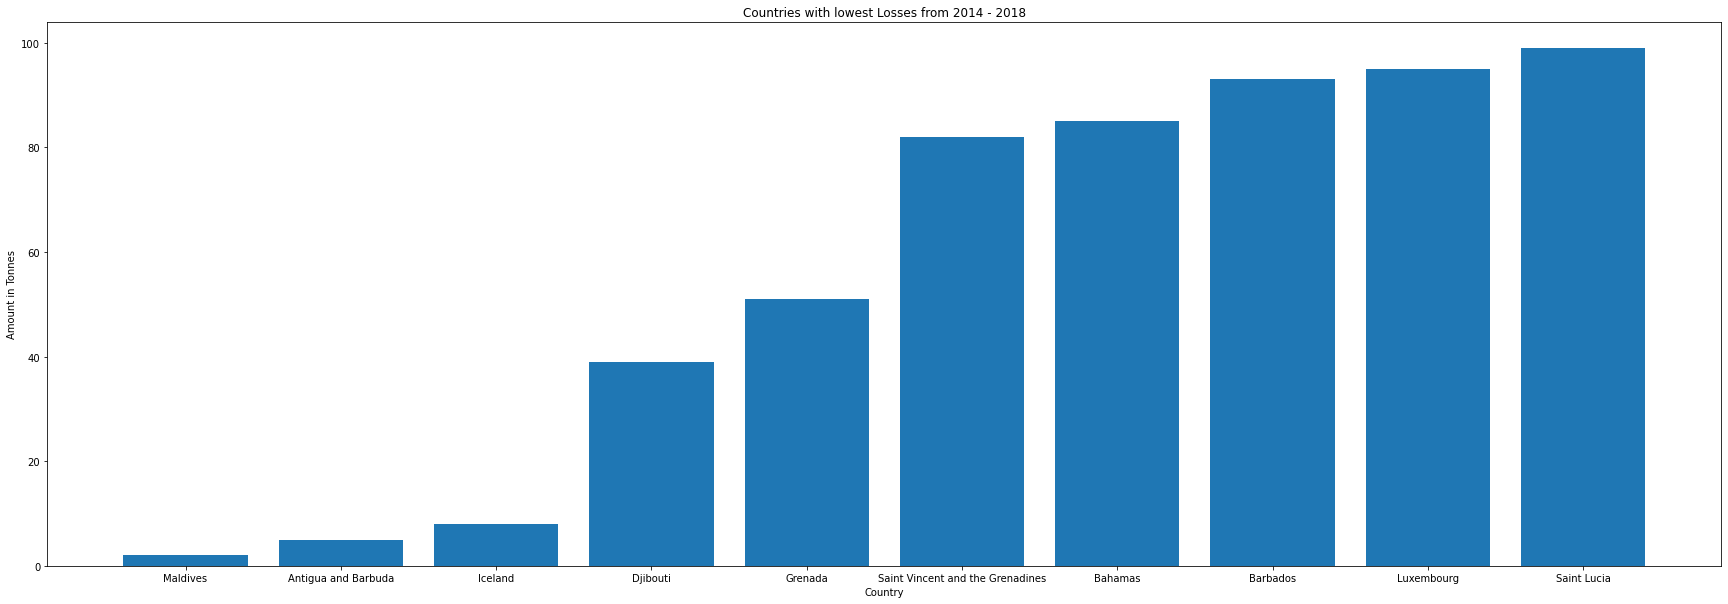

In [39]:
plt.figure(figsize=(30,10))
plt.bar(range(1,11), temp.Losses, tick_label = temp.Area)
plt.title("Countries with lowest Losses from 2014 - 2018")
plt.xlabel("Country")
plt.ylabel("Amount in Tonnes")
plt.show()

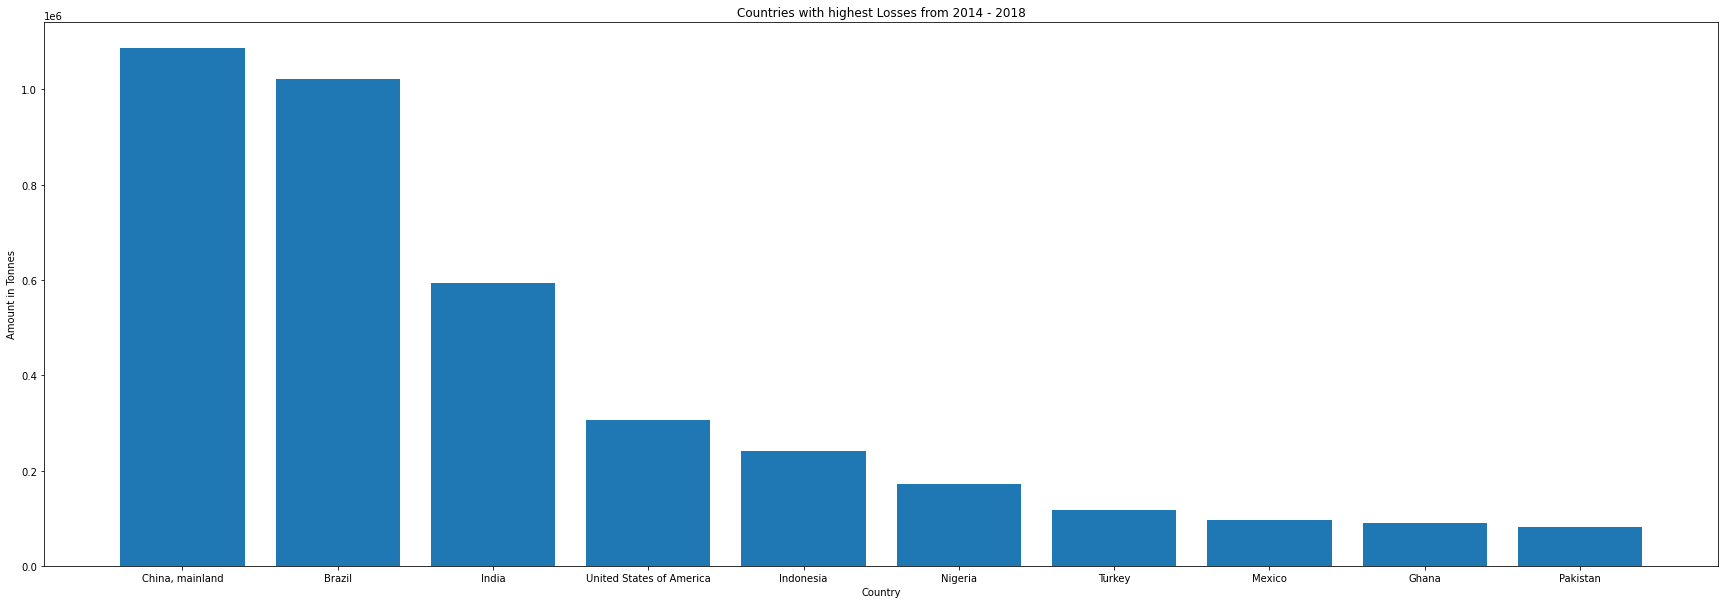

In [40]:
temp = items_last_5_years.sort_values("Losses", ascending=False)
temp.reset_index(drop = True, inplace=True)
temp = temp.head(10)
plt.figure(figsize=(30,10))
plt.bar(range(1,11), temp.Losses, tick_label = temp.Area)
plt.title("Countries with highest Losses from 2014 - 2018")
plt.xlabel("Country")
plt.ylabel("Amount in Tonnes")
plt.show()

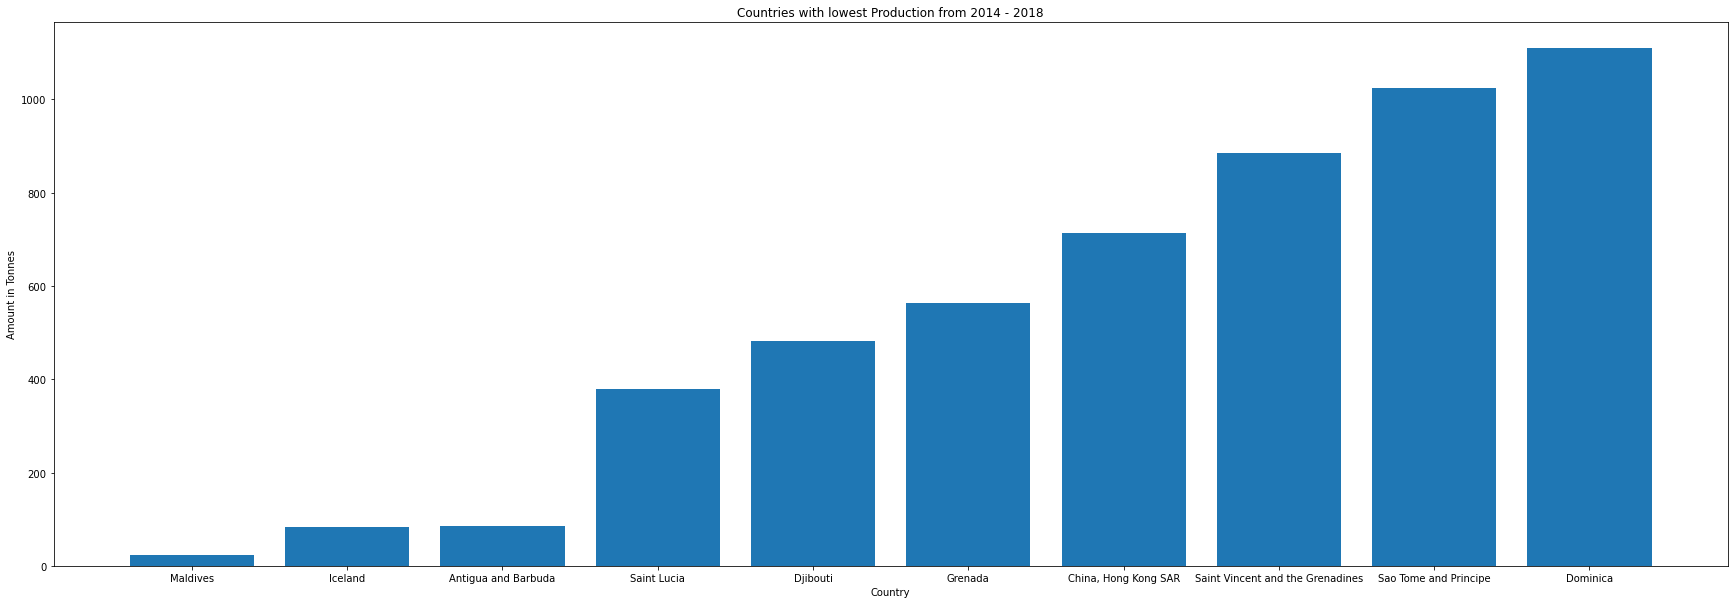

In [41]:
temp = items_last_5_years.sort_values("Production", ascending=True)
temp.reset_index(drop = True, inplace=True)
temp = temp.head(10)
plt.figure(figsize=(30,10))
plt.bar(range(1,11), temp.Production, tick_label = temp.Area)
plt.title("Countries with lowest Production from 2014 - 2018")
plt.xlabel("Country")
plt.ylabel("Amount in Tonnes")
plt.show()

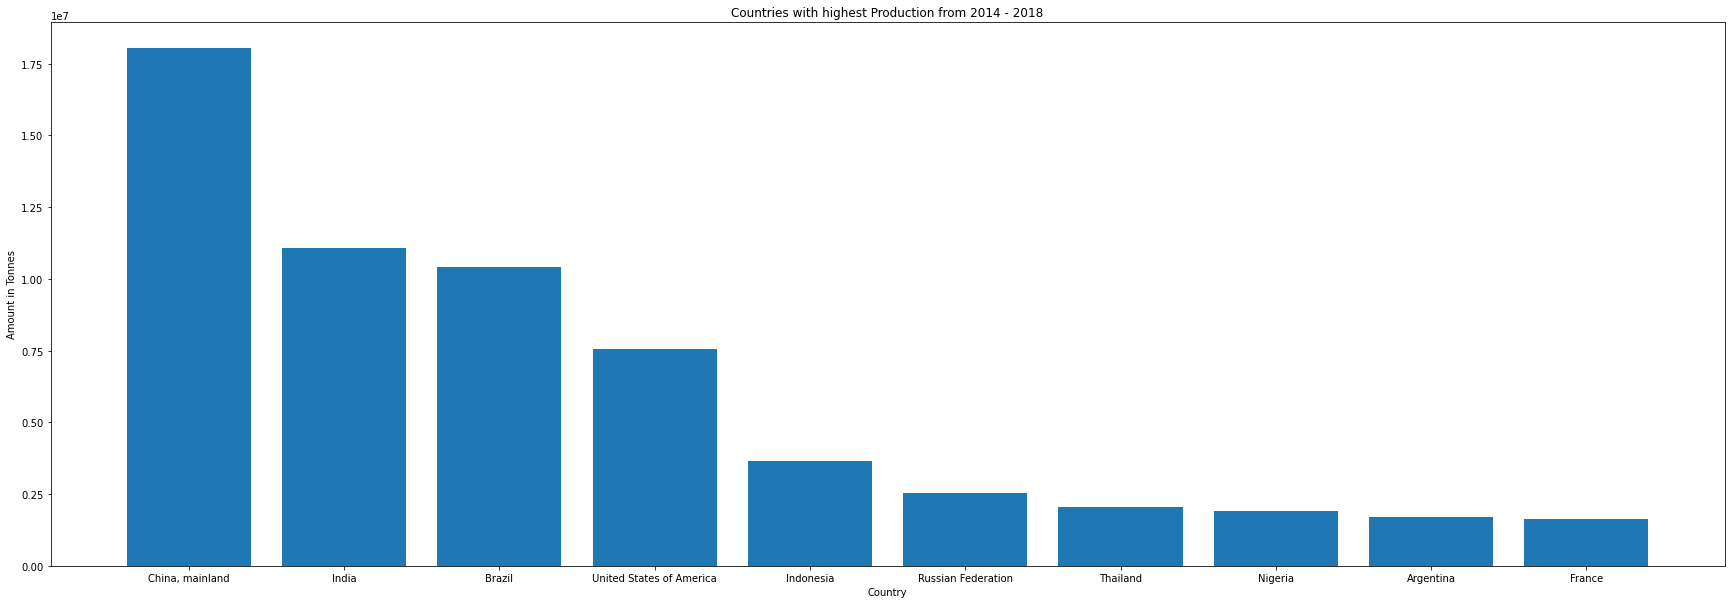

In [42]:
temp = items_last_5_years.sort_values("Production", ascending=False)
temp.reset_index(drop = True, inplace=True)
temp = temp.head(10)
plt.figure(figsize=(30,10))
plt.bar(range(1,11), temp.Production, tick_label = temp.Area)
plt.title("Countries with highest Production from 2014 - 2018")
plt.xlabel("Country")
plt.ylabel("Amount in Tonnes")
plt.show()

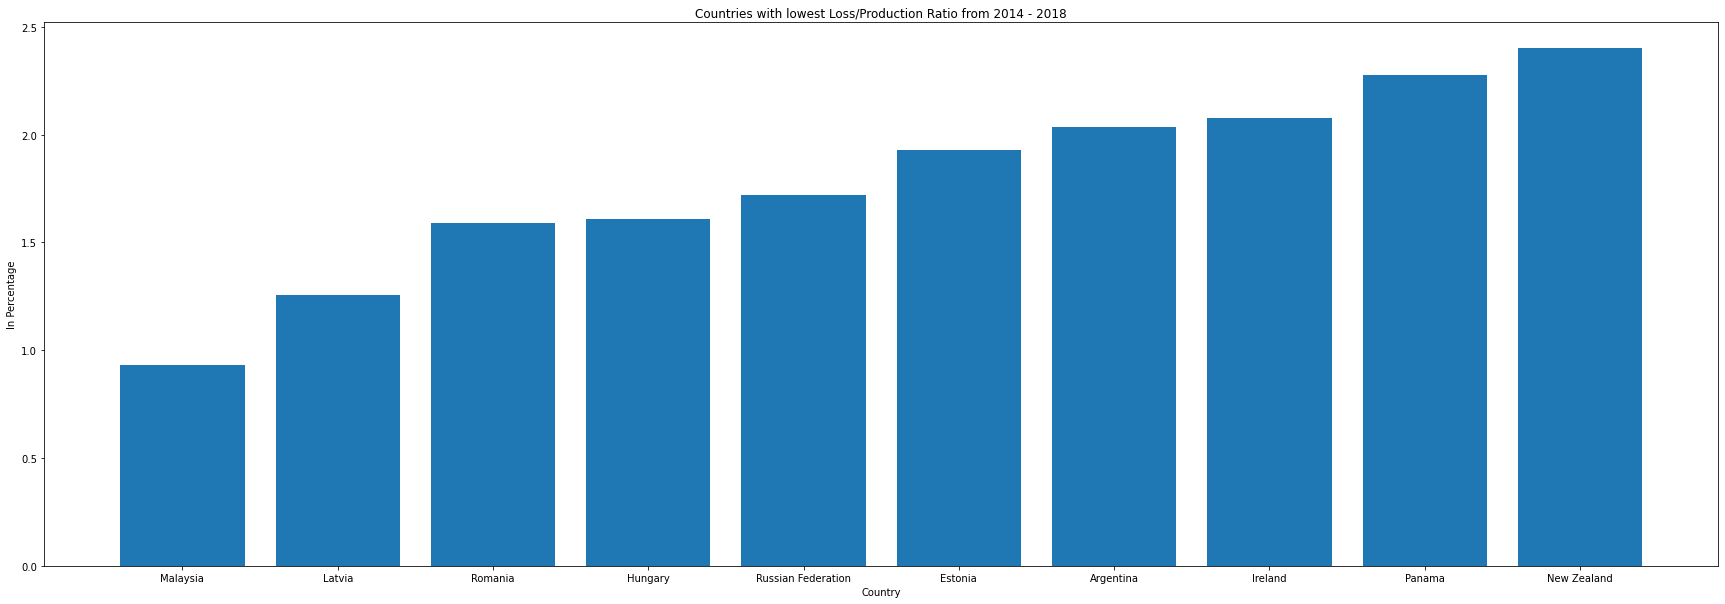

In [43]:
temp = items_last_5_years.sort_values("Ratio_percent", ascending=True)
temp.reset_index(drop = True, inplace=True)
temp = temp.head(10)
plt.figure(figsize=(30,10))
plt.bar(range(1,11), temp.Ratio_percent, tick_label = temp.Area)
plt.title("Countries with lowest Loss/Production Ratio from 2014 - 2018")
plt.xlabel("Country")
plt.ylabel("In Percentage")
plt.show()

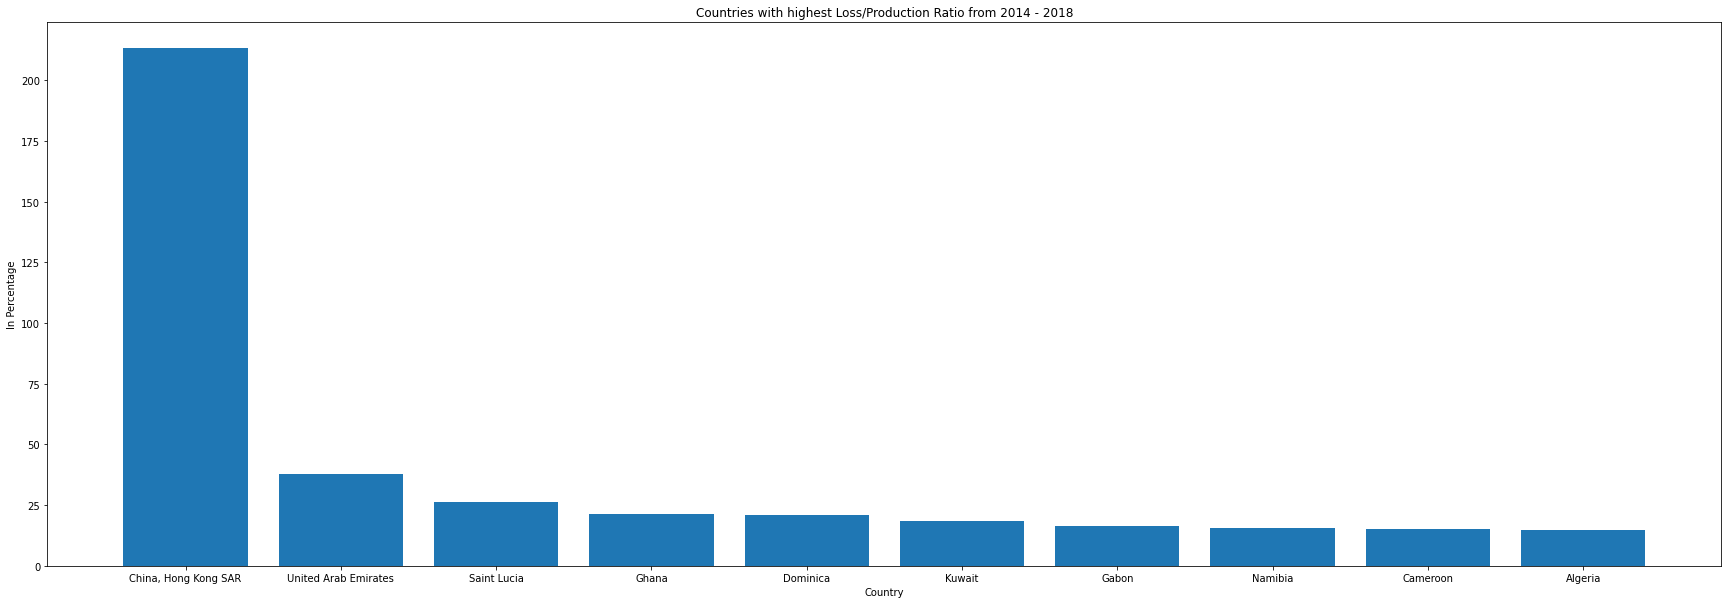

In [44]:
temp = items_last_5_years.sort_values("Ratio_percent", ascending=False)
temp.reset_index(drop = True, inplace=True)
temp = temp.head(10)
plt.figure(figsize=(30,10))
plt.bar(range(1,11), temp.Ratio_percent, tick_label = temp.Area)
plt.title("Countries with highest Loss/Production Ratio from 2014 - 2018")
plt.xlabel("Country")
plt.ylabel("In Percentage")
plt.show()

# Looking at only perishable

In [45]:
items_last_5_years= last_5_years[last_5_years["Non Perishable"] == "P"].drop("Non Perishable Code", axis = 1).groupby(["Area","Element"]).sum("Amount in Tonnes").reset_index()

items_last_5_years.head()

,Area,Element,Amount in Tonnes
0,Afghanistan,Losses,3518.0
1,Afghanistan,Production,48177.0
2,Albania,Losses,2042.0
3,Albania,Production,25190.0
4,Algeria,Losses,24207.0


In [46]:
losses_last_5 = items_last_5_years[items_last_5_years.Element == "Losses"].drop("Element", axis = 1)
production_last_5 = items_last_5_years[items_last_5_years.Element == "Production"].drop("Element", axis = 1)
losses_last_5.rename(columns= {"Amount in Tonnes":"Losses"}, inplace=True)
production_last_5.rename(columns= {"Amount in Tonnes":"Production"}, inplace=True)
items_last_5_years = pd.merge(left = losses_last_5, right = production_last_5, on = "Area")
items_last_5_years["Ratio_percent"] = 100 * items_last_5_years["Losses"] / items_last_5_years["Production"]
items_last_5_years = items_last_5_years[items_last_5_years.Losses > 0]
items_last_5_years.head()

,Area,Losses,Production,Ratio_percent
0,Afghanistan,3518.0,48177.0,7.302240
1,Albania,2042.0,25190.0,8.106391
2,Algeria,24207.0,197131.0,12.279652
3,Angola,25217.0,171284.0,14.722333
4,Antigua and Barbuda,5.0,86.0,5.813953


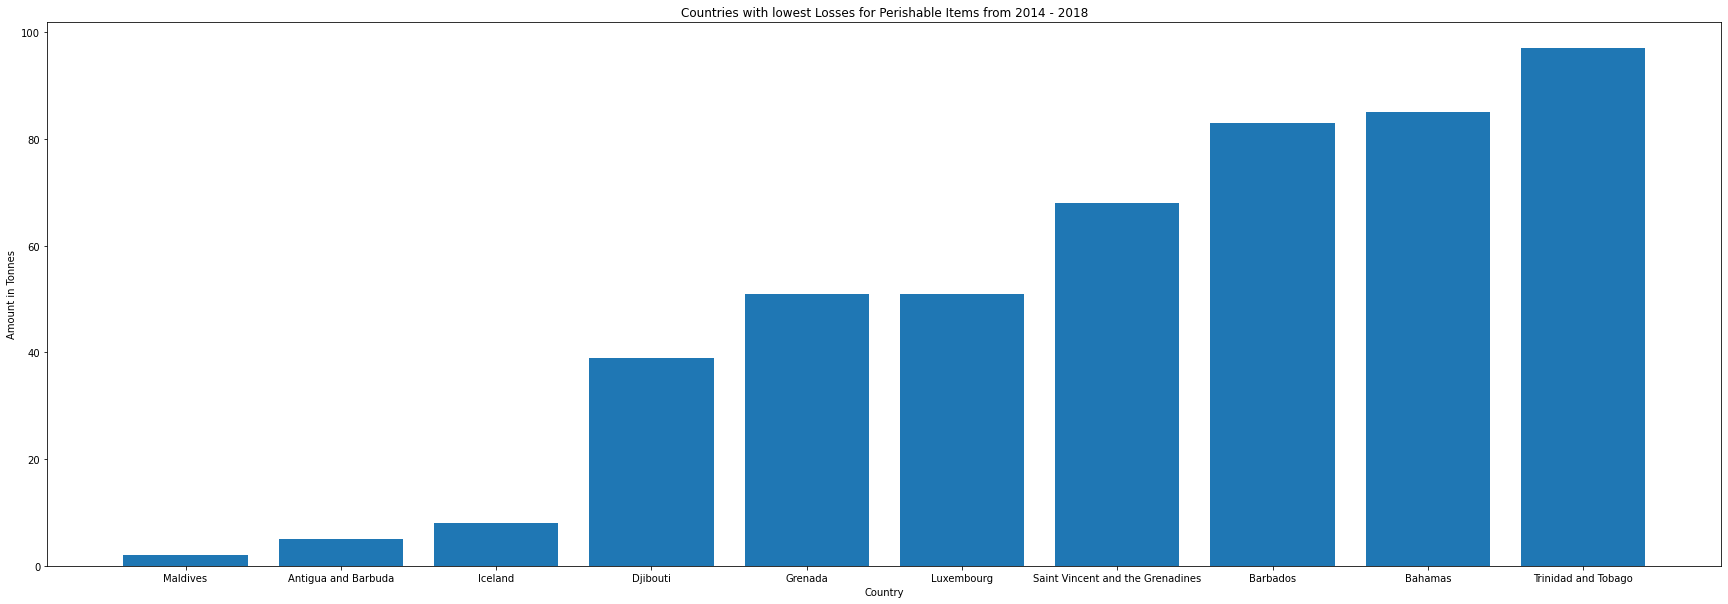

In [47]:
temp = items_last_5_years.sort_values("Losses", ascending=True)
temp.reset_index(drop = True, inplace=True)
temp = temp.head(10)
plt.figure(figsize=(30,10))
plt.bar(range(1,11), temp.Losses, tick_label = temp.Area)
plt.title("Countries with lowest Losses for Perishable Items from 2014 - 2018")
plt.xlabel("Country")
plt.ylabel("Amount in Tonnes")
plt.show()

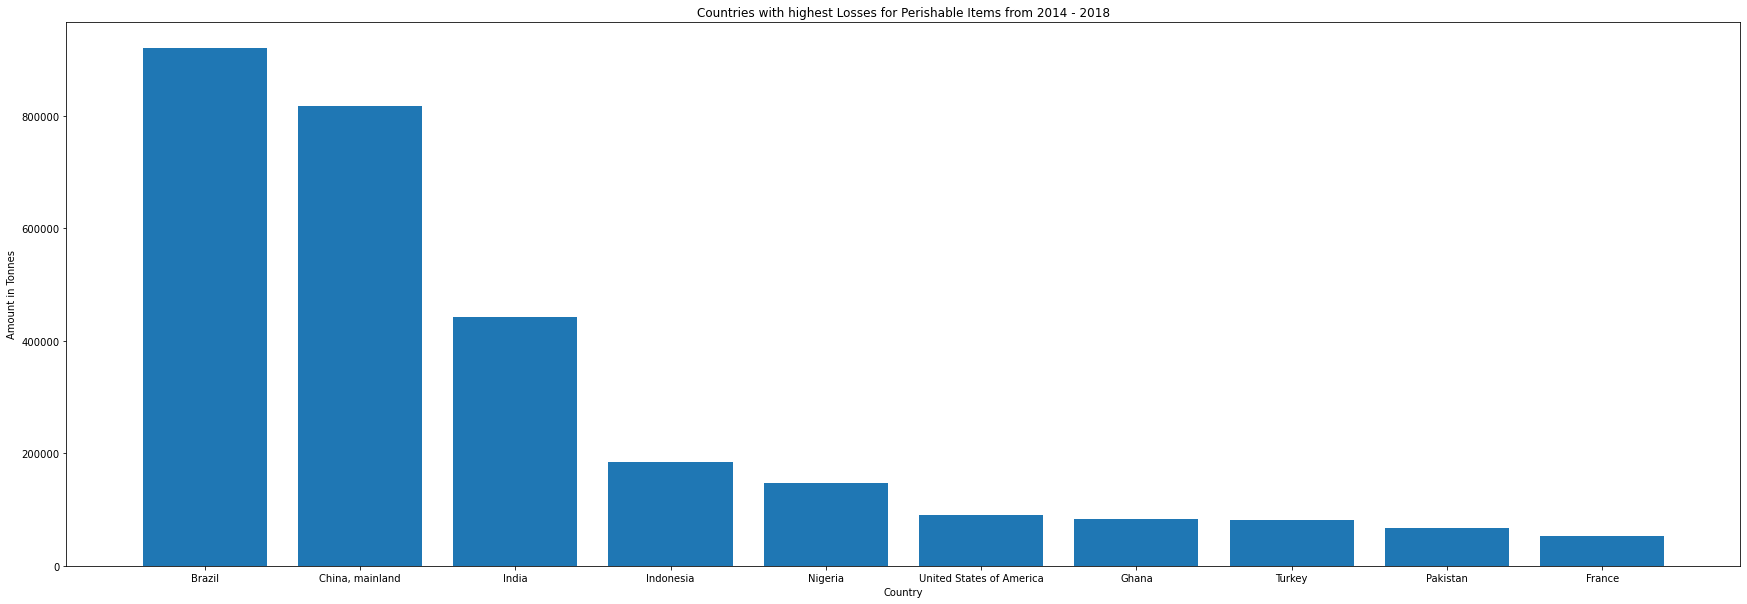

In [48]:
temp = items_last_5_years.sort_values("Losses", ascending=False)
temp.reset_index(drop = True, inplace=True)
temp = temp.head(10)
plt.figure(figsize=(30,10))
plt.bar(range(1,11), temp.Losses, tick_label = temp.Area)
plt.title("Countries with highest Losses for Perishable Items from 2014 - 2018")
plt.xlabel("Country")
plt.ylabel("Amount in Tonnes")
plt.show()

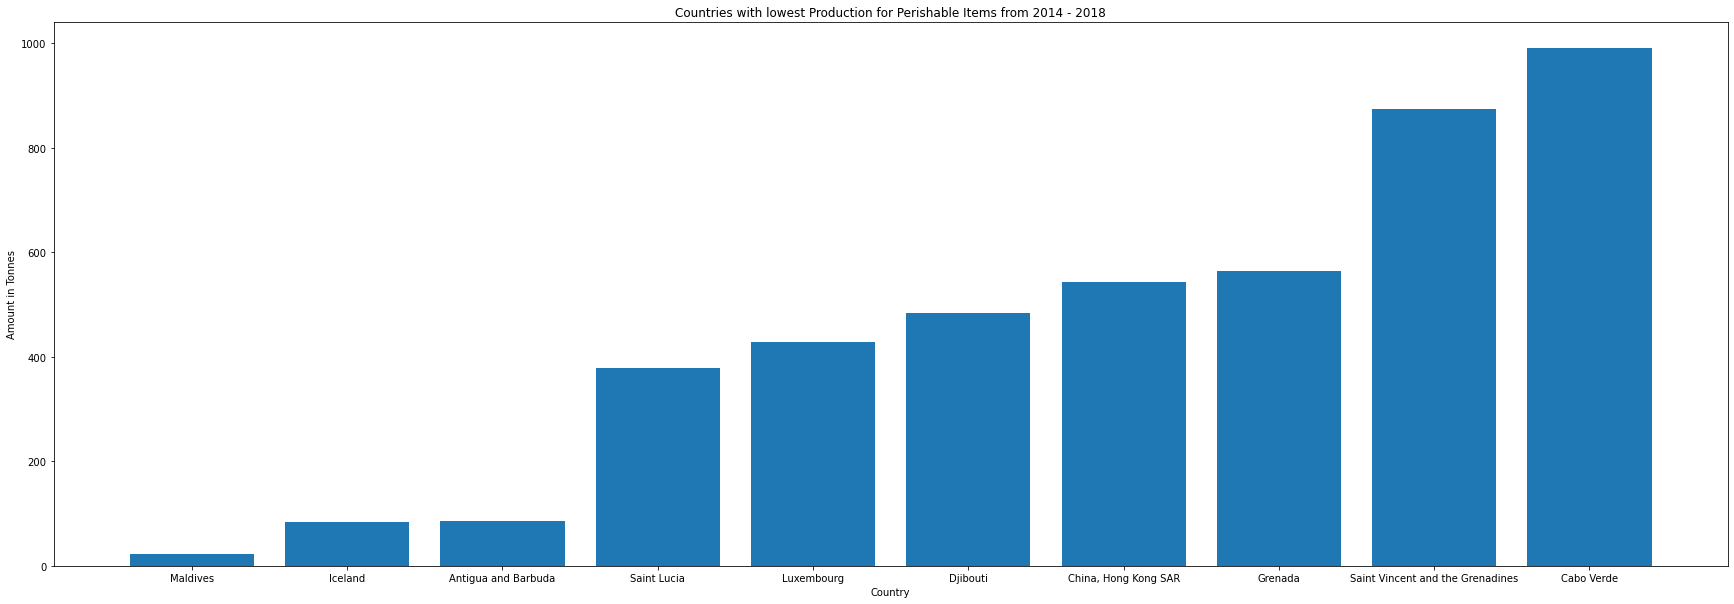

In [49]:
temp = items_last_5_years.sort_values("Production", ascending=True)
temp.reset_index(drop = True, inplace=True)
temp = temp.head(10)
plt.figure(figsize=(30,10))
plt.bar(range(1,11), temp.Production, tick_label = temp.Area)
plt.title("Countries with lowest Production for Perishable Items from 2014 - 2018")
plt.xlabel("Country")
plt.ylabel("Amount in Tonnes")
plt.show()

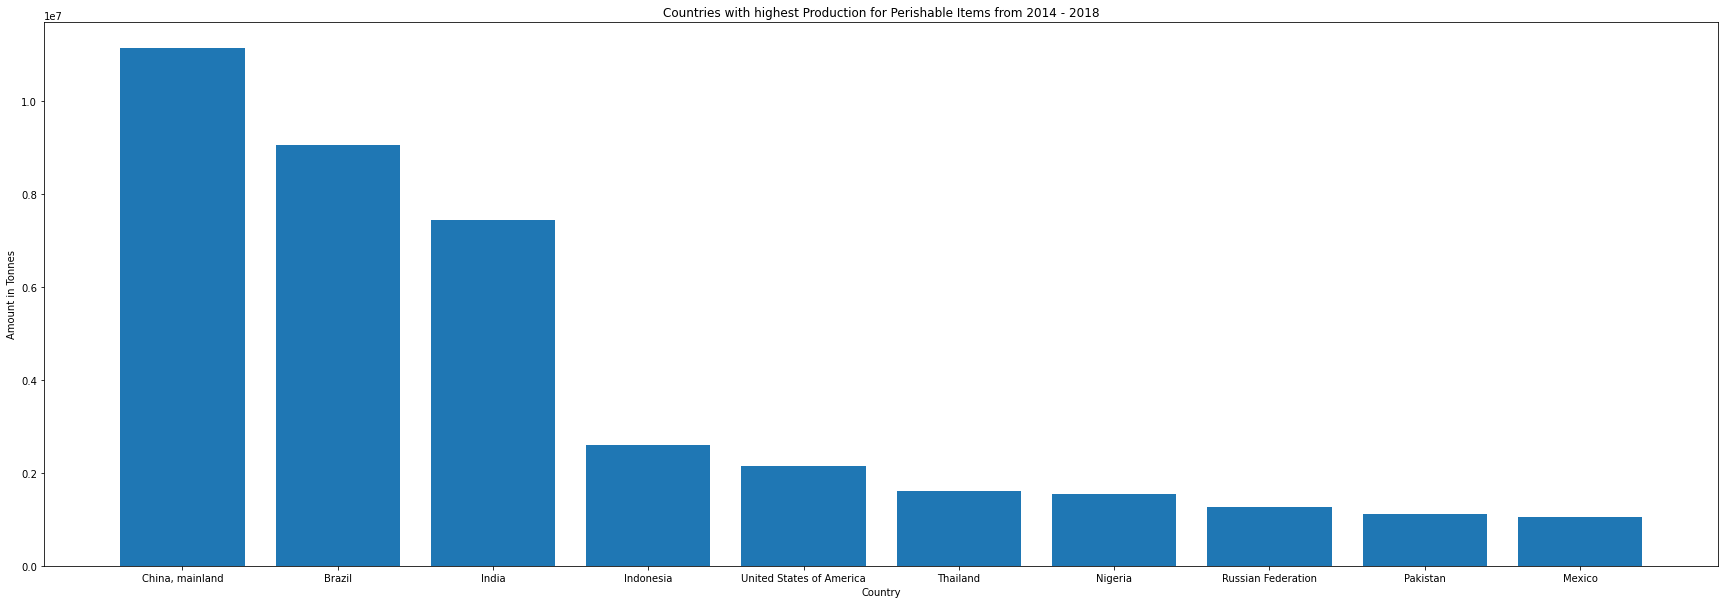

In [50]:
temp = items_last_5_years.sort_values("Production", ascending=False)
temp.reset_index(drop = True, inplace=True)
temp = temp.head(10)
plt.figure(figsize=(30,10))
plt.bar(range(1,11), temp.Production, tick_label = temp.Area)
plt.title("Countries with highest Production for Perishable Items from 2014 - 2018")
plt.xlabel("Country")
plt.ylabel("Amount in Tonnes")
plt.show()

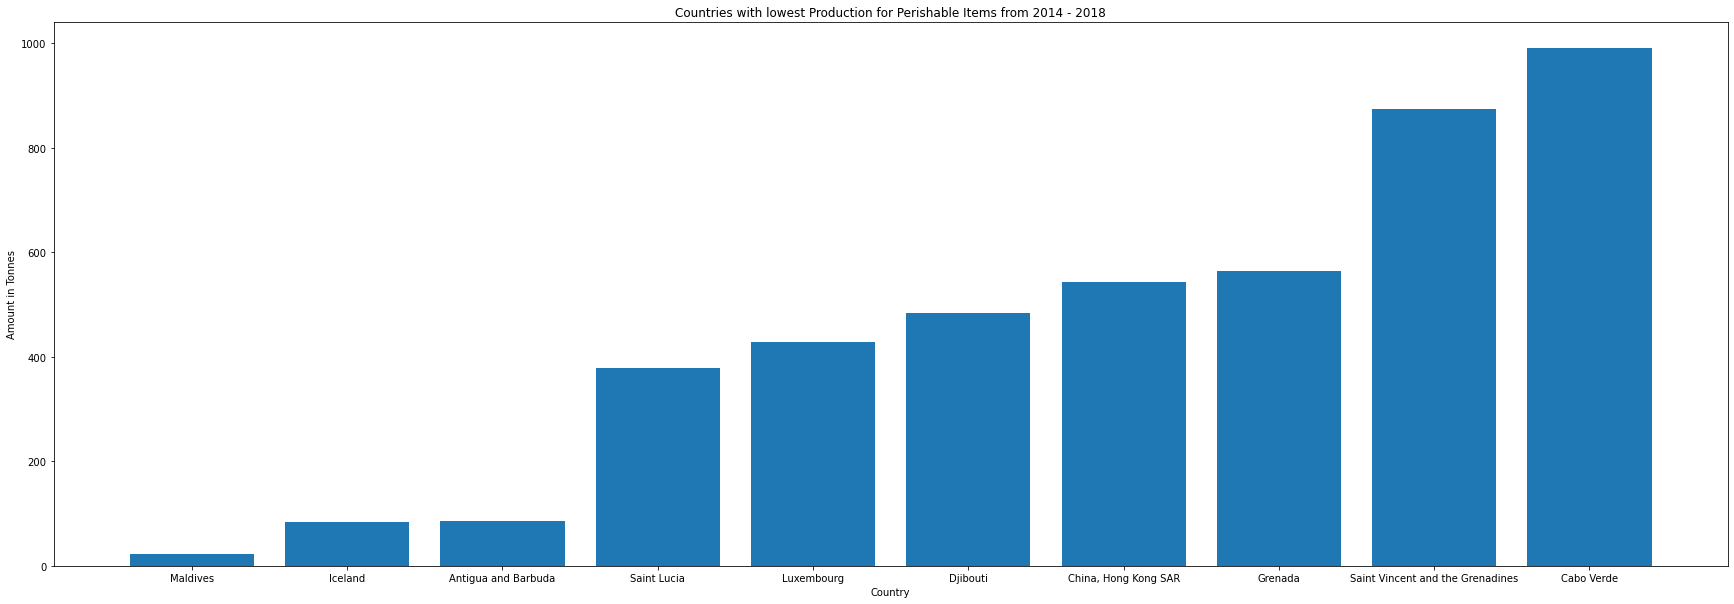

In [51]:
temp = items_last_5_years.sort_values("Production", ascending=True)
temp.reset_index(drop = True, inplace=True)
temp = temp.head(10)
plt.figure(figsize=(30,10))
plt.bar(range(1,11), temp.Production, tick_label = temp.Area)
plt.title("Countries with lowest Production for Perishable Items from 2014 - 2018")
plt.xlabel("Country")
plt.ylabel("Amount in Tonnes")
plt.show()

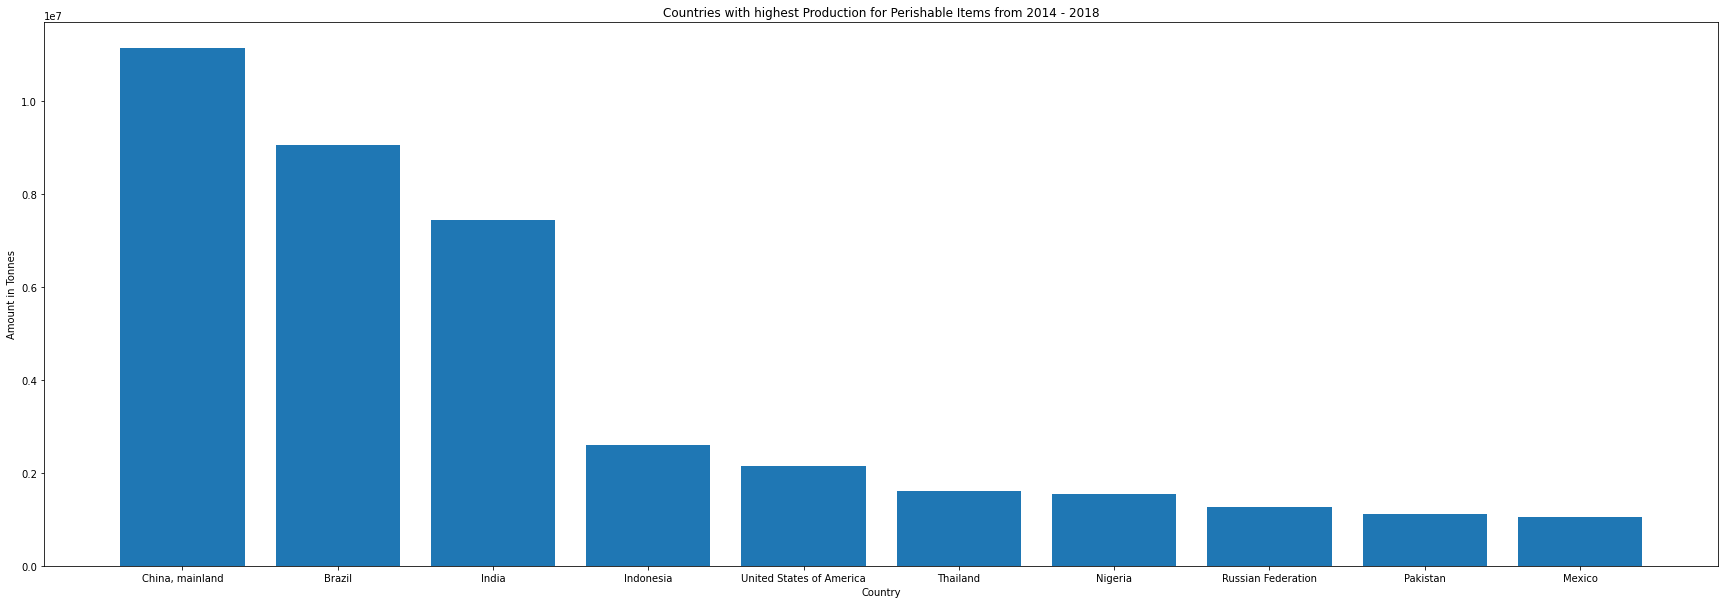

In [52]:
temp = items_last_5_years.sort_values("Production", ascending=False)
temp.reset_index(drop = True, inplace=True)
temp = temp.head(10)
plt.figure(figsize=(30,10))
plt.bar(range(1,11), temp.Production, tick_label = temp.Area)
plt.title("Countries with highest Production for Perishable Items from 2014 - 2018")
plt.xlabel("Country")
plt.ylabel("Amount in Tonnes")
plt.show()

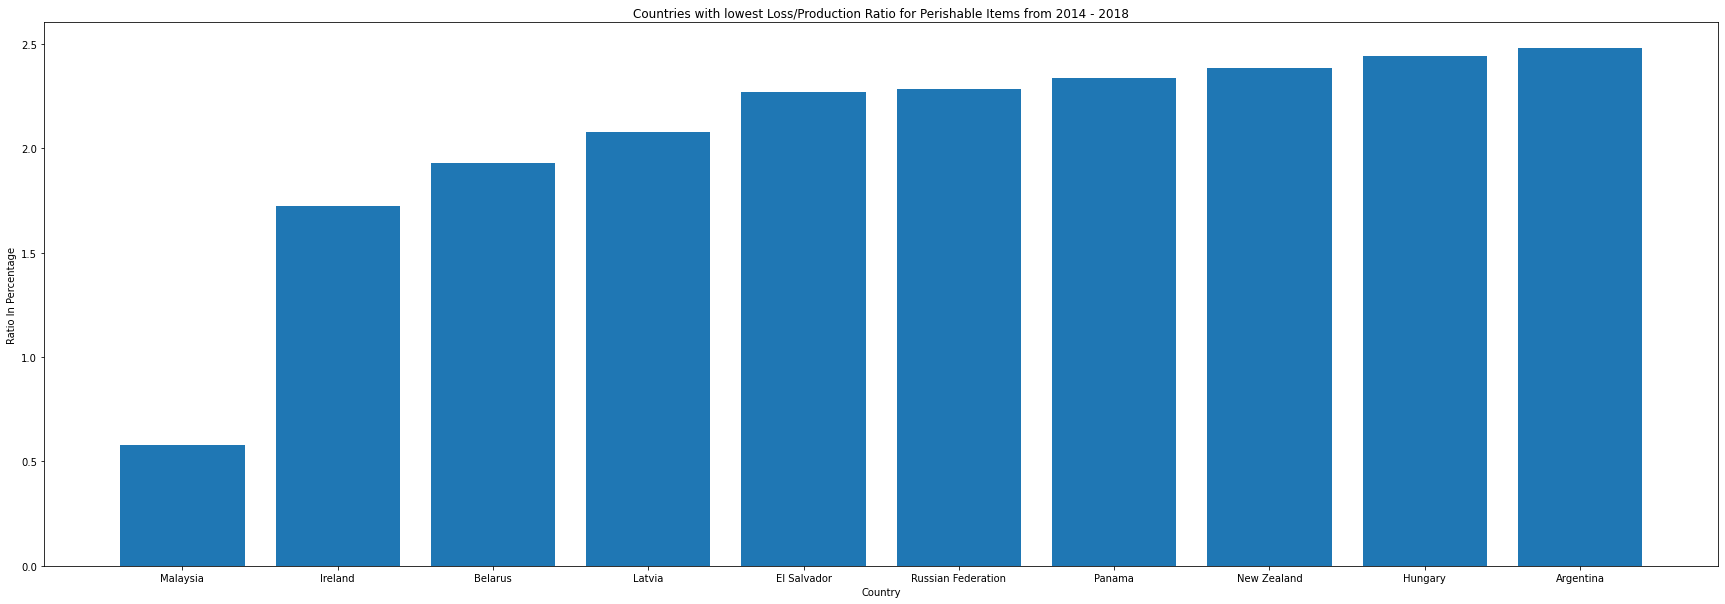

In [53]:
temp = items_last_5_years.sort_values("Ratio_percent", ascending=True)
temp.reset_index(drop = True, inplace=True)
temp = temp.head(10)
plt.figure(figsize=(30,10))
plt.bar(range(1,11), temp.Ratio_percent, tick_label = temp.Area)
plt.title("Countries with lowest Loss/Production Ratio for Perishable Items from 2014 - 2018")
plt.xlabel("Country")
plt.ylabel("Ratio In Percentage")
plt.show()

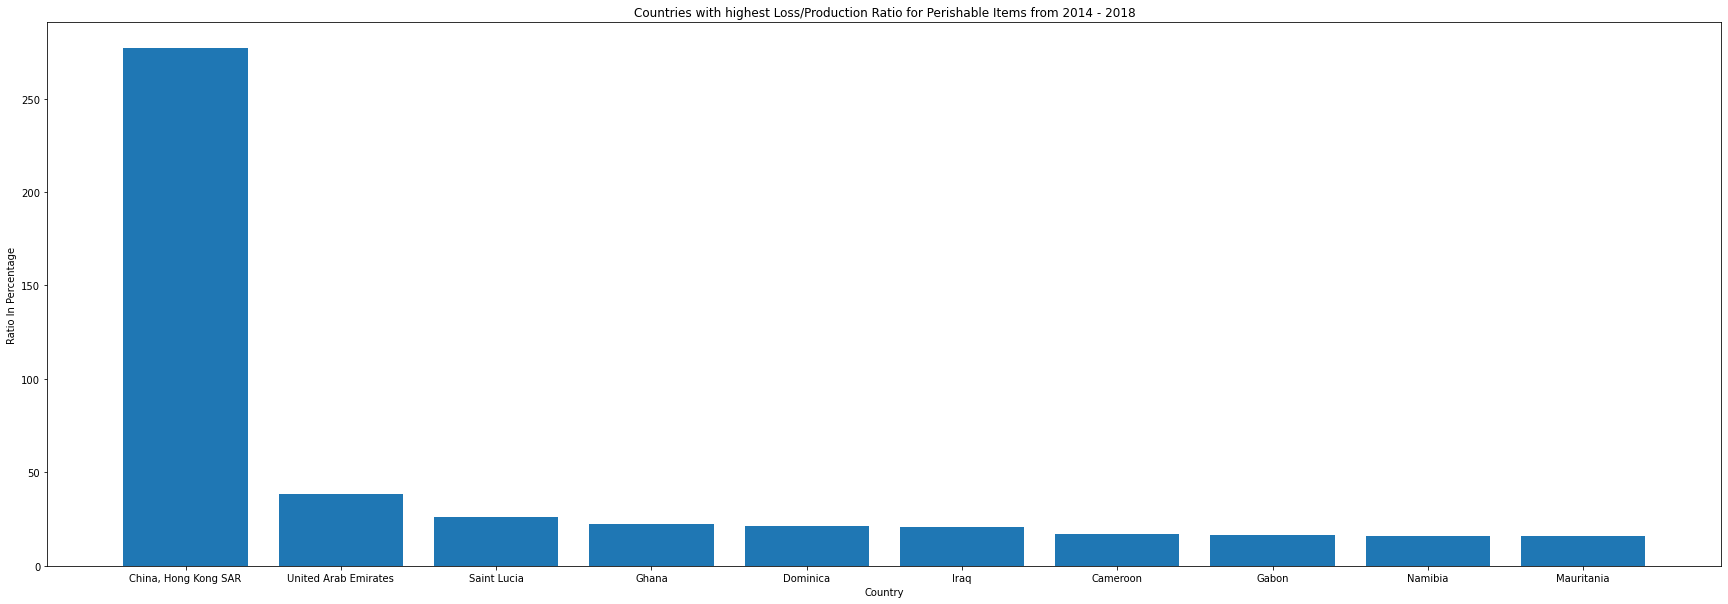

In [54]:
temp = items_last_5_years.sort_values("Ratio_percent", ascending=False)
temp.reset_index(drop = True, inplace=True)
temp = temp.head(10)
plt.figure(figsize=(30,10))
plt.bar(range(1,11), temp.Ratio_percent, tick_label = temp.Area)
plt.title("Countries with highest Loss/Production Ratio for Perishable Items from 2014 - 2018")
plt.xlabel("Country")
plt.ylabel("Ratio In Percentage")
plt.show()

# Looking at Non Perishable

In [55]:
items_last_5_years= last_5_years[last_5_years["Non Perishable"] == "NP"].drop("Non Perishable Code", axis = 1).groupby(["Area","Element"]).sum("Amount in Tonnes").reset_index()

items_last_5_years.head()

,Area,Element,Amount in Tonnes
0,Afghanistan,Losses,7867.0
1,Afghanistan,Production,55551.0
2,Albania,Losses,858.0
3,Albania,Production,7890.0
4,Algeria,Losses,11963.0


In [56]:
losses_last_5 = items_last_5_years[items_last_5_years.Element == "Losses"].drop("Element", axis = 1)
production_last_5 = items_last_5_years[items_last_5_years.Element == "Production"].drop("Element", axis = 1)
losses_last_5.rename(columns= {"Amount in Tonnes":"Losses"}, inplace=True)
production_last_5.rename(columns= {"Amount in Tonnes":"Production"}, inplace=True)
items_last_5_years = pd.merge(left = losses_last_5, right = production_last_5, on = "Area")
items_last_5_years["Ratio_percent"] = 100 * items_last_5_years["Losses"] / items_last_5_years["Production"]
items_last_5_years = items_last_5_years[items_last_5_years.Losses > 0]
items_last_5_years.head()

,Area,Losses,Production,Ratio_percent
0,Afghanistan,7867.0,55551.0,14.161761
1,Albania,858.0,7890.0,10.874525
2,Algeria,11963.0,45545.0,26.266330
3,Angola,3852.0,40988.0,9.397873
4,Argentina,16302.0,962200.0,1.694242


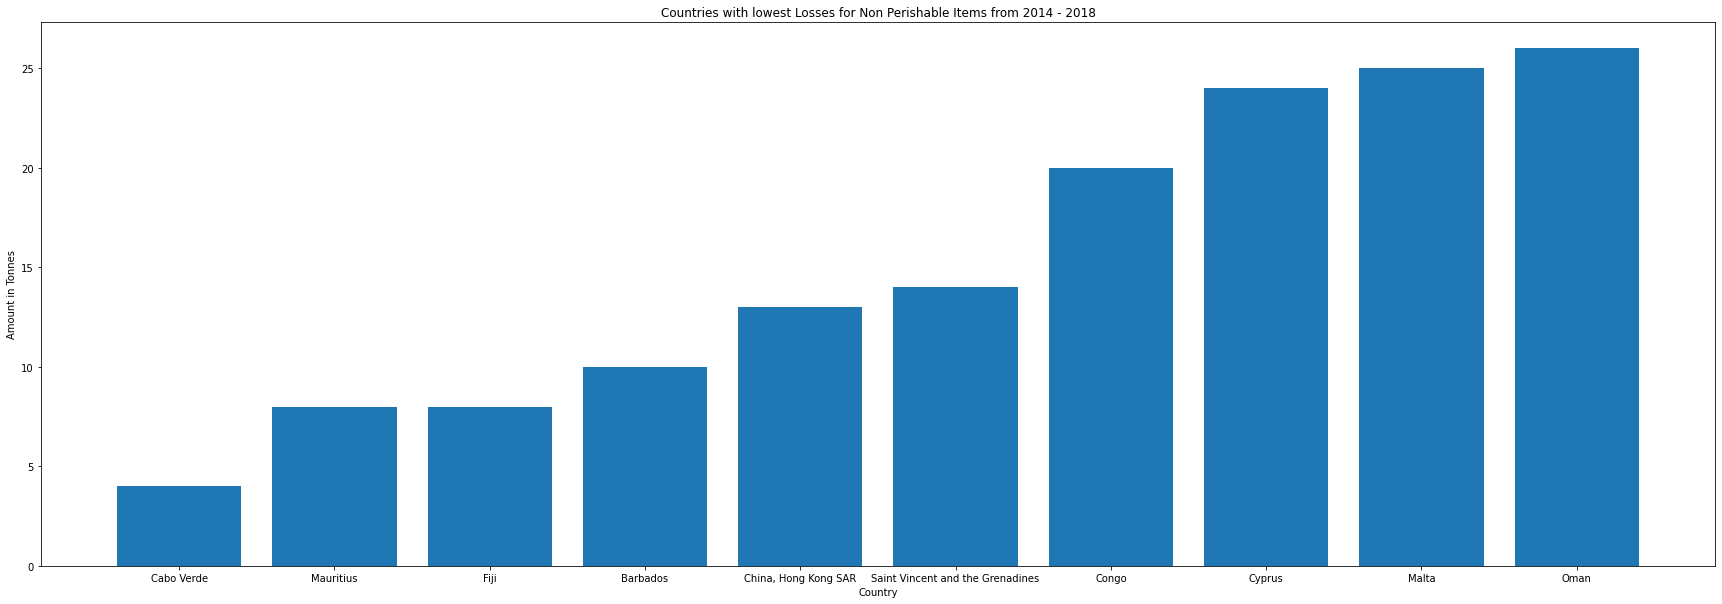

In [57]:
temp = items_last_5_years.sort_values("Losses", ascending=True)
temp.reset_index(drop = True, inplace=True)
temp = temp.head(10)
plt.figure(figsize=(30,10))
plt.bar(range(1,11), temp.Losses, tick_label = temp.Area)
plt.title("Countries with lowest Losses for Non Perishable Items from 2014 - 2018")
plt.xlabel("Country")
plt.ylabel("Amount in Tonnes")
plt.show()

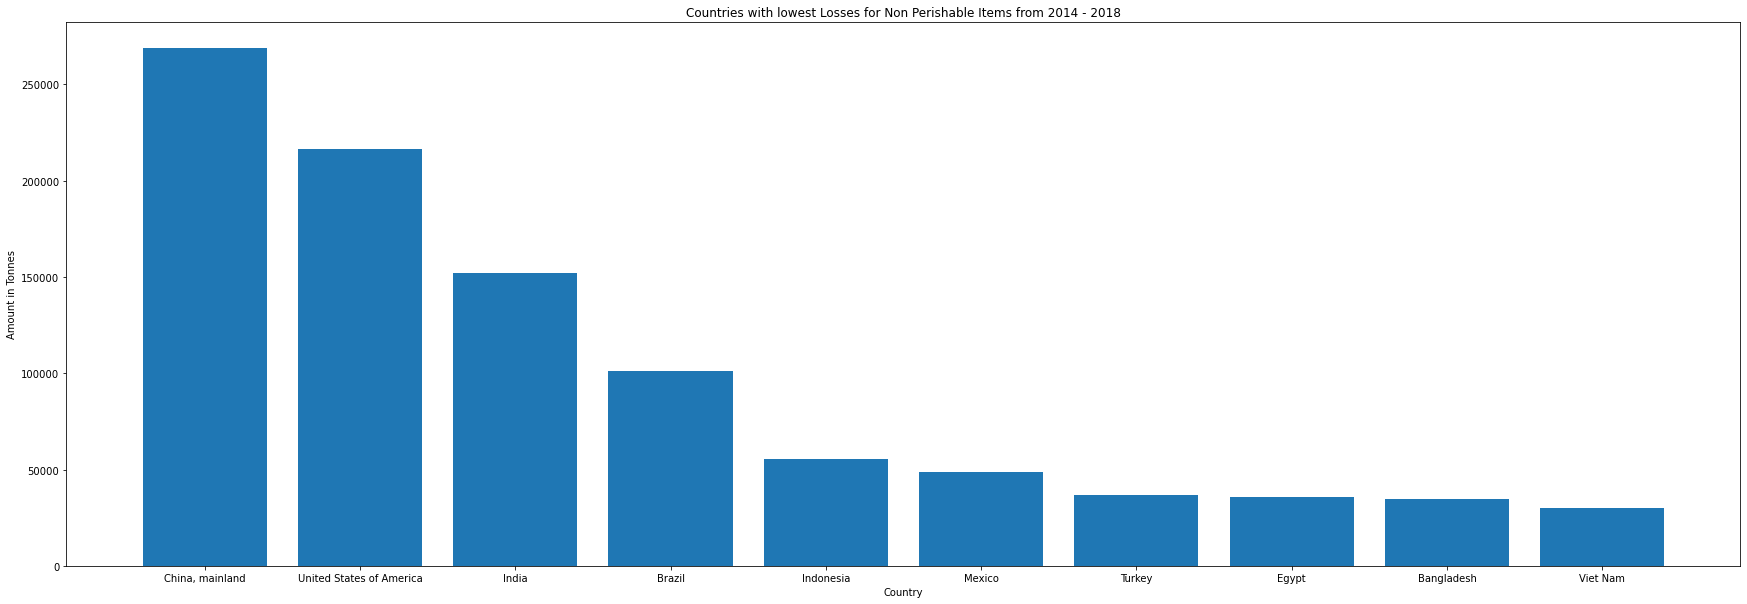

In [58]:
temp = items_last_5_years.sort_values("Losses", ascending=False)
temp.reset_index(drop = True, inplace=True)
temp = temp.head(10)
plt.figure(figsize=(30,10))
plt.bar(range(1,11), temp.Losses, tick_label = temp.Area)
plt.title("Countries with lowest Losses for Non Perishable Items from 2014 - 2018")
plt.xlabel("Country")
plt.ylabel("Amount in Tonnes")
plt.show()

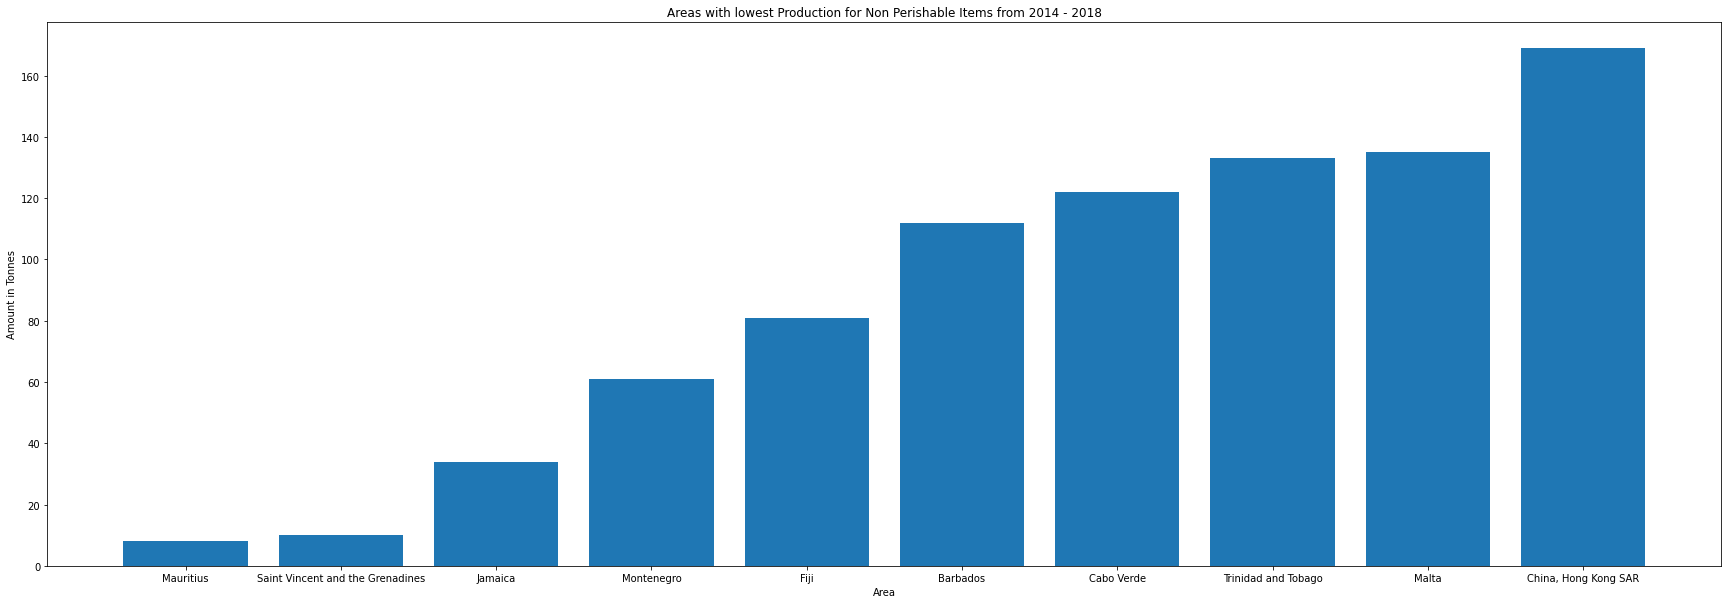

In [59]:
temp = items_last_5_years.sort_values("Production", ascending=True)
temp.reset_index(drop = True, inplace=True)
temp = temp.head(10)
plt.figure(figsize=(30,10))
plt.bar(range(1,11), temp.Production, tick_label = temp.Area)
plt.title("Areas with lowest Production for Non Perishable Items from 2014 - 2018")
plt.xlabel("Area")
plt.ylabel("Amount in Tonnes")
plt.show()

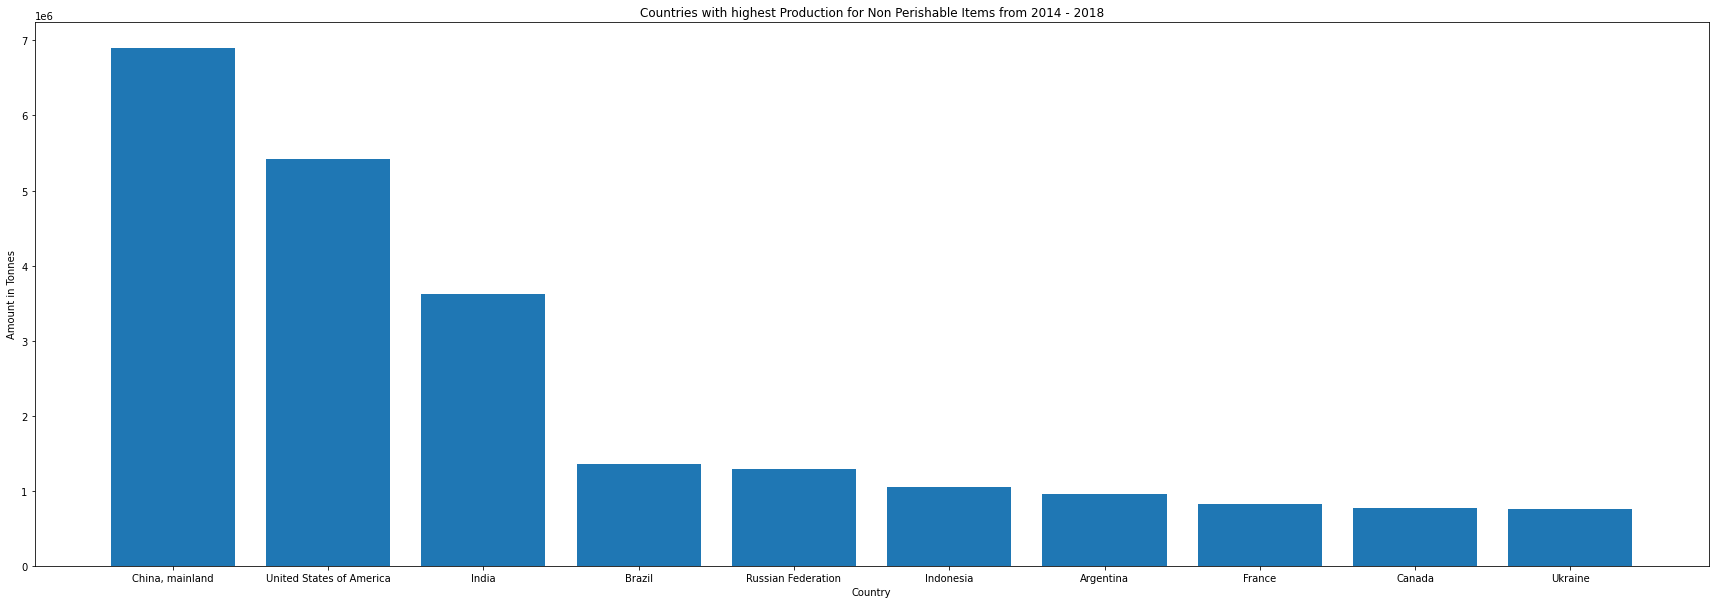

In [60]:
temp = items_last_5_years.sort_values("Production", ascending=False)
temp.reset_index(drop = True, inplace=True)
temp = temp.head(10)
plt.figure(figsize=(30,10))
plt.bar(range(1,11), temp.Production, tick_label = temp.Area)
plt.title("Countries with highest Production for Non Perishable Items from 2014 - 2018")
plt.xlabel("Country")
plt.ylabel("Amount in Tonnes")
plt.show()

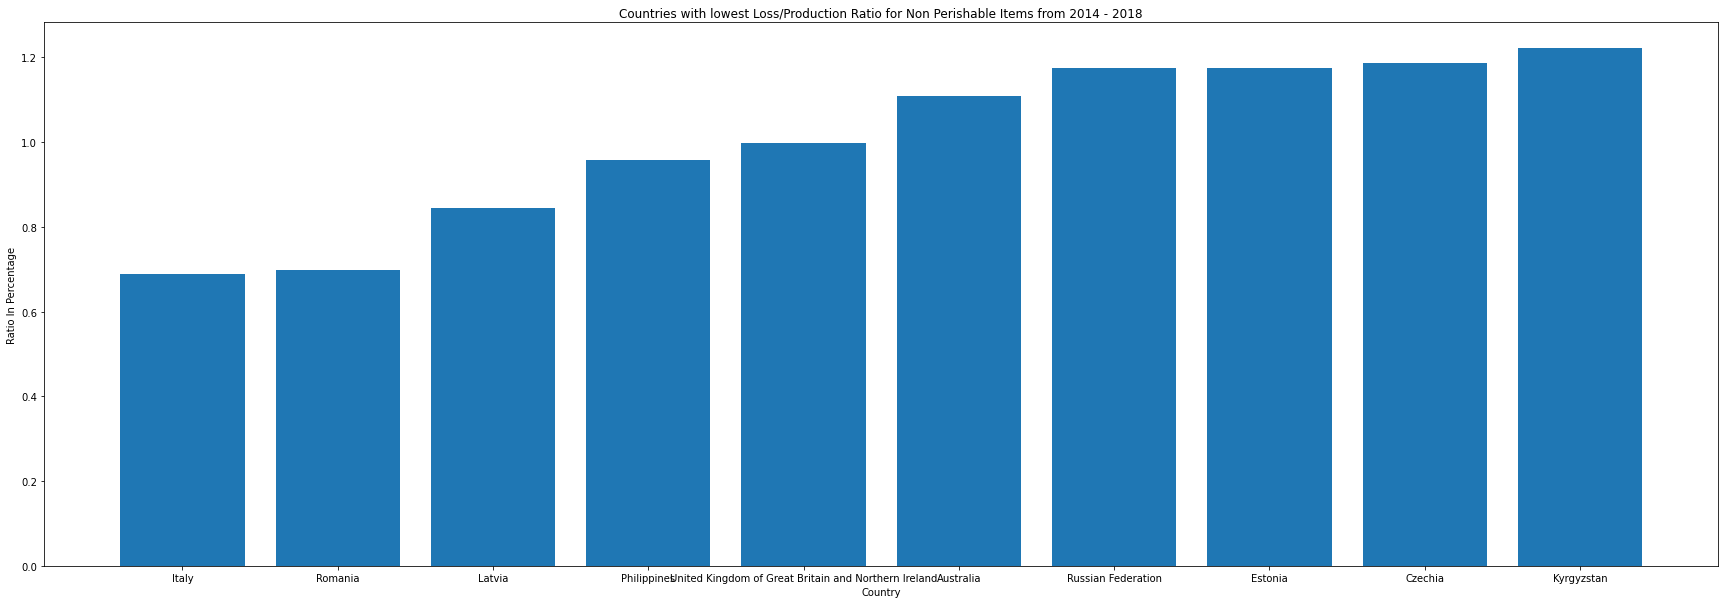

In [61]:
temp = items_last_5_years.sort_values("Ratio_percent", ascending=True)
temp.reset_index(drop = True, inplace=True)
temp = temp.head(10)
plt.figure(figsize=(30,10))
plt.bar(range(1,11), temp.Ratio_percent, tick_label = temp.Area)
plt.title("Countries with lowest Loss/Production Ratio for Non Perishable Items from 2014 - 2018")
plt.xlabel("Country")
plt.ylabel("Ratio In Percentage")
plt.show()

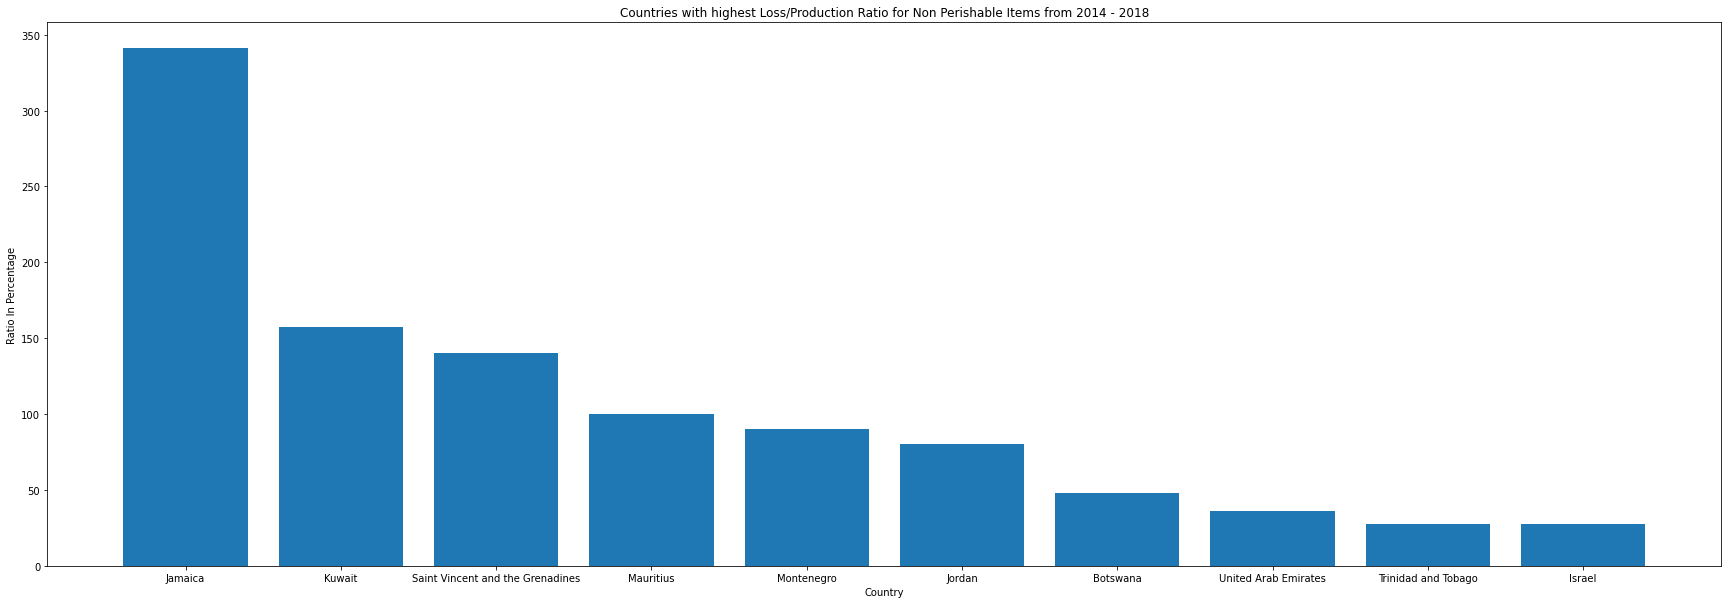

In [62]:
temp = items_last_5_years.sort_values("Ratio_percent", ascending=False)
temp.reset_index(drop = True, inplace=True)
temp = temp.head(10)
plt.figure(figsize=(30,10))
plt.bar(range(1,11), temp.Ratio_percent, tick_label = temp.Area)
plt.title("Countries with highest Loss/Production Ratio for Non Perishable Items from 2014 - 2018")
plt.xlabel("Country")
plt.ylabel("Ratio In Percentage")
plt.show()

In [63]:
#creating ratios_tibble
frames = list()
df = pd.read_csv("tibble.csv", index_col=0)
#found = False
years = range (1961,2019)
items = list(set(df.Item.values))
countries = list(set(df.Area.values))
for country in countries:
    #print(country)
    temp1 = df[df.Area == country]
    #print(temp1.head())
    for item in items:
        #print(item)
        temp2 = temp1[temp1.Item == item]
        if temp2.shape[0] > 0:
            #print(temp2.head())
        
            code = list(set(temp2["Non Perishable Code"].values))
            #print (code)
            flag = list(set(temp2["Non Perishable"].values))
            #print (flag)
            for year in years:
                year = str(year)
                temp3 = temp2[(temp2.Year == year)]
                if temp3.shape[0] > 0:
                    #found = True
                    #print(temp3.head())
                    loss = temp3[temp3.Element == "Losses"]["Amount in Tonnes"].values[0]
                    #print(loss)
                    production = temp3[temp3.Element == "Production"]["Amount in Tonnes"].values[0]
                    #print(production)
                    try:
                        ratio_percent = 100.0 * loss / production
                    except:
                        ratio_percent = 0.0
                    #print(ratio_percent)
                    if ratio_percent > 0:
                        new_df = pd.DataFrame([[country, item, code[0], flag[0], "ratio_percent",year, ratio_percent]],
                                   columns=["Area","Item","Non Perishable Code","Non Perishable","Element","Year","Ratio_percent"])
                        #print(new_df.head())
                        frames.append(new_df)
                
    
new_tibble = pd.concat(frames)
new_tibble.head()

C:\Users\sylvi\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\sylvi\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars


,Area,Item,Non Perishable Code,Non Perishable,Element,Year,Ratio_percent
0,Guinea,Coffee and products,1,NP,ratio_percent,2014,4.545455
0,Guinea,Coffee and products,1,NP,ratio_percent,2015,6.250000
0,Guinea,Coffee and products,1,NP,ratio_percent,2016,5.128205
0,Guinea,Coffee and products,1,NP,ratio_percent,2017,4.878049
0,Guinea,Coffee and products,1,NP,ratio_percent,2018,4.651163


In [64]:
new_tibble.to_csv("all_ratios_tibble.csv")

In [65]:
ratios_df = df.groupby(["Area","Year","Element"]).agg({'Amount in Tonnes':"sum"}).reset_index()

In [66]:
years = list(set(ratios_df.Year.values))
countries = list(set(ratios_df.Area.values))
frames = list()
for country in countries:
    #print(country)
    temp1 = ratios_df[ratios_df.Area == country]
    #print(temp1.head())
    for year in years:
        #print(item)
        temp2 = temp1[temp1.Year == year]
        if temp2.shape[0] > 0:
            loss = temp2[temp2.Element == "Losses"]["Amount in Tonnes"].values[0]
                    
            production = temp2[temp2.Element == "Production"]["Amount in Tonnes"].values[0]
                    
            try:
                ratio_percent = 100.0 * loss / production
            except:
                ratio_percent = 0.0
                    
            if ratio_percent > 0:
                new_df = pd.DataFrame([[country, year, ratio_percent]],
                                   columns=["Area","Year","Ratio_precent"])
                #print(new_df.head())
                frames.append(new_df)
                
new_tibble = pd.concat(frames)
new_tibble.head()
    

C:\Users\sylvi\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


,Area,Year,Ratio_precent
0,Guinea,1978,12.172750
0,Guinea,1996,13.004590
0,Guinea,1981,12.342476
0,Guinea,1964,12.728639
0,Guinea,1986,12.942779


In [67]:
new_tibble.to_csv("country_year_ratios_tibble.csv")

In [68]:
ratios_df = df.groupby(["Area","Year","Non Perishable","Element"]).agg({'Amount in Tonnes':"sum"}).reset_index()
ratios_df.head()

,Area,Year,Non Perishable,Element,Amount in Tonnes
0,Afghanistan,1961,NP,Losses,622.0
1,Afghanistan,1961,NP,Production,7272.0
2,Afghanistan,1961,P,Losses,169.0
3,Afghanistan,1961,P,Production,2871.0
4,Afghanistan,1962,NP,Losses,618.0


In [69]:
years = list(set(ratios_df.Year.values))
countries = list(set(ratios_df.Area.values))
codes = list(set(ratios_df["Non Perishable"].values))
frames = list()
for country in countries:
    #print(country)
    temp1 = ratios_df[ratios_df.Area == country]
    #print(temp1.head())
    for code in codes:
        #print(item)
        temp2 = temp1[temp1["Non Perishable"] == code]
        if temp2.shape[0] > 0:
            
            for year in years:
                year = str(year)
                temp3 = temp2[(temp2.Year == year)]
                if temp3.shape[0] > 0:
                    #found = True
                    #print(temp3.head())
                    loss = temp3[temp3.Element == "Losses"]["Amount in Tonnes"].values[0]
                    #print(loss)
                    production = temp3[temp3.Element == "Production"]["Amount in Tonnes"].values[0]
                    #print(production)
                    try:
                        ratio_percent = 100.0 * loss / production
                    except:
                        ratio_percent = 0.0
                    #print(ratio_percent)
                    if ratio_percent > 0:
                        new_df = pd.DataFrame([[country,code, "ratio_percent",year, ratio_percent]],
                                   columns=["Area","Non Perishable","Element","Year","Ratio_percent"])
                        #print(new_df.head())
                        frames.append(new_df)
                
    
new_tibble = pd.concat(frames)
new_tibble.head()
    

C:\Users\sylvi\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\sylvi\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars


,Area,Non Perishable,Element,Year,Ratio_percent
0,Guinea,P,ratio_percent,1978,10.176456
0,Guinea,P,ratio_percent,1996,10.334248
0,Guinea,P,ratio_percent,1981,10.140368
0,Guinea,P,ratio_percent,1964,10.920285
0,Guinea,P,ratio_percent,1986,10.398694


In [70]:
new_tibble.to_csv("country_year_perishableornp_ratios_tibble.csv")